<div style="text-align: center;">
    <img src="https://storage.googleapis.com/kaggle-media/competitions/House%20Prices/kaggle_5407_media_housesbanner.png" alt="Image" style="width: auto; height: auto;">
</div>

<br/>
<div style = "text-align: center"><font size = 6 color = "#B22222" face = "verdana"><b>House Prices - Advanced Regression Techniques</b></font></div> <br/> 
<div style = "text-align: center"><font size = 5 color = "#00008B" face = "verdana"><b>Md.Abdullah-Al Mamun</b></font></div>

<a id = "table-of-contents"></a>
# Table of Contents   
    
[1. Introduction](#intro)
   - [About the dataset](#intro)
   - [Information about the dataset](#information)
   - [Identify the features and the targets](#features)
   - [Label Encoding Categorical Columns](#Encoding)





[2. Data Exploration and Analysis](#Exploration)
   - [Visualizing the distribution ](#Exploration)
   - [The correlation matrix](#correlation)
   - [Data Cleaning,Checking errors, Missing values](#Cleaning)
   - [Correlation matrix heatmap](#heatmap)
   - [Outlier detection(Normality test)](#Outlier_detection)
   - [Visualizing outliers](#Outlier_viz)
   




[3. Feature Engineering](#Feature_Engineering)
   - [Checking if transformation is needed](#Feature_Engineering)
   - [Transformation](#Transformation)
   - [Feature importance Analysis](#Feature_importance)
   - [Feature Selection and visualization](#Feature_Selection)
   - [Feature rankings](#Feature_rankings)




[4. Model Building and Evaluation](#Model)
   - [The best model and interpretation](#best_Model)
   - [Model Evaluation and Comparison](#compare)
   - [Hyperparameter Tuning and Model Selection](#Tuning)
   - [Model Prediction using test data](#using_test_data)

   
   
  
  
[5. Deep Learning (Pytorch Lightening)](#Pytorch)
   - [Visualizing the Losses(Train VS Validation Loss)](#Losses)
   - [End Result](#Final_Prediction)

  



<a id="intro"></a>


# 1. Introduction

## About the dataset

This dataset encompasses a comprehensive array of features detailing various aspects of residential properties in Ames, Iowa. It includes 79 explanatory variables, encompassing a wide range of information beyond just the number of bedrooms or the presence of a white-picket fence. These variables shed light on diverse aspects of the homes, allowing for a nuanced understanding of their characteristics.

## Goal:

The primary objective of this task is to predict the final sale price for each house in the dataset. 


### Libraries

In [1]:
# Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import warnings
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import pytorch_lightning as pl

### Loading the training data

In [2]:
# Loading the training data
data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
data 

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

<a id="information"></a>

### Getting information about the dataset

In [3]:
# Getting information about the dataset.

info = data.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Description of the data

In [4]:
description = data.describe()
description 

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [5]:
# Checking the missing values in each coulmn

missing_values = data.isnull().sum()
missing_values

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<a id="features"></a>

## Identify the features and the targets:


### Targets/labels: 'SalePrice' column
- The target variable for this project is 'SalePrice'.
- The goal is to predict the final sale price for each house in the dataset.


### Features(predictor):  All columns except 'SalePrice' from the dataset.

- These are the explanatory variables that provide information about residential properties in Ames, Iowa.
- They include columns such as 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', and many more, comprising a total of 79 explanatory variables.

<a id="Encoding"></a>

## Label Encoding Categorical Columns


In [6]:
# Encodes categorical columns using LabelEncoder.

def Label_Encoder(df):
    object_cols = df.select_dtypes(include='object').columns
    for col in object_cols:
        df[col] = LabelEncoder().fit_transform(df[col])
    return df

data = Label_Encoder(data)
data

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0        1          60         3         65.0     8450       1      2   
1        2          20         3         80.0     9600       1      2   
2        3          60         3         68.0    11250       1      2   
3        4          70         3         60.0     9550       1      2   
4        5          60         3         84.0    14260       1      2   
...    ...         ...       ...          ...      ...     ...    ...   
1455  1456          60         3         62.0     7917       1      2   
1456  1457          20         3         85.0    13175       1      2   
1457  1458          70         3         66.0     9042       1      2   
1458  1459          20         3         68.0     9717       1      2   
1459  1460          20         3         75.0     9937       1      2   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0            3            3          0  ...         0       3      4   
1            3            3          0  ...         0       3      4   
2            0            3          0  ...         0       3      4   
3            0            3          0  ...         0       3      4   
4            0            3          0  ...         0       3      4   
...        ...          ...        ...  ...       ...     ...    ...   
1455         3            3          0  ...         0       3      4   
1456         3            3          0  ...         0       3      2   
1457         3            3          0  ...         0       3      0   
1458         3            3          0  ...         0       3      4   
1459         3            3          0  ...         0       3      4   

      MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0               4        0       2    2008         8              4     208500  
1               4        0       5    2007         8              4     181500  
2               4        0       9    2008         8              4     223500  
3               4        0       2    2006         8              0     140000  
4               4        0      12    2008         8              4     250000  
...           ...      ...     ...     ...       ...            ...        ...  
1455            4        0       8    2007         8              4     175000  
1456            4        0       2    2010         8              4     210000  
1457            2     2500       5    2010         8              4     266500  
1458            4        0       4    2010         8              4     142125  
1459            4        0       6    2008         8              4     147500  

[1460 rows x 81 columns]

<a id="Exploration"></a>
# 2. Data Exploration and Analysis
### Visualizing the distribution


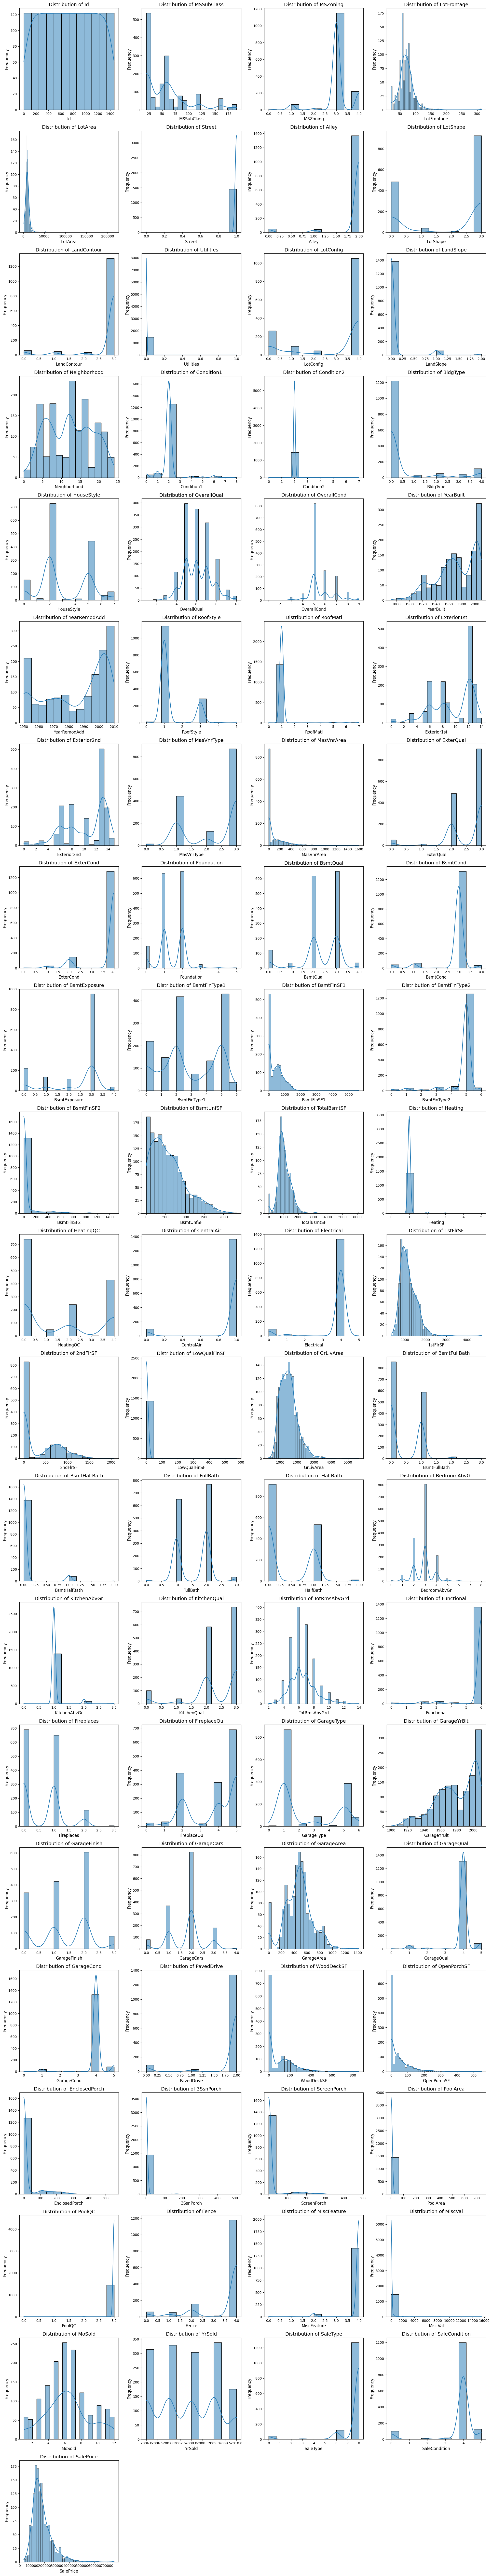

In [7]:
#Plotting the distribution of each column in the DataFrame.
    
def plot_distribution(data):
    num_columns = len(data.columns)
    num_plots_per_row = 4
    num_rows = -(-num_columns // num_plots_per_row) 

    plt.figure(figsize=(20, 5 * num_rows))  

    for i, column in enumerate(data.columns, 1):
        plt.subplot(num_rows, num_plots_per_row, i)
        sns.histplot(data[column], kde=True)
        plt.title(f"Distribution of {column}", fontsize=14)  
        plt.xlabel(column, fontsize=12)  
        plt.ylabel('Frequency', fontsize=12)  

        if i % num_plots_per_row == 0 or i == num_columns:
            plt.subplots_adjust(wspace=0.5, hspace=0.5) 

    plt.tight_layout()  # Adjust layout
    plt.show()


plot_distribution(data)

<a id="correlation"></a>
## The correlation matrix

In [8]:
# # Calculating the absolute correlation matrix

correlation_matrix = abs(data.corr()).round(2)
correlation_matrix

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  \
Id             1.00        0.01      0.01         0.01     0.03    0.01   
MSSubClass     0.01        1.00      0.04         0.39     0.14    0.02   
MSZoning       0.01        0.04      1.00         0.11     0.03    0.09   
LotFrontage    0.01        0.39      0.11         1.00     0.43    0.04   
LotArea        0.03        0.14      0.03         0.43     1.00    0.20   
...             ...         ...       ...          ...      ...     ...   
MoSold         0.02        0.01      0.03         0.01     0.00    0.00   
YrSold         0.00        0.02      0.02         0.01     0.01    0.03   
SaleType       0.02        0.01      0.10         0.03     0.01    0.01   
SaleCondition  0.01        0.02      0.01         0.06     0.03    0.01   
SalePrice      0.02        0.08      0.17         0.35     0.26    0.04   

               Alley  LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  \
Id              0.00      0.03         0.02       0.01  ...      0.06    0.03   
MSSubClass      0.11      0.12         0.00       0.02  ...      0.01    0.01   
MSZoning        0.05      0.06         0.02       0.00  ...      0.00    0.00   
LotFrontage     0.14      0.17         0.08        NaN  ...      0.21    0.20   
LotArea         0.06      0.17         0.15       0.01  ...      0.08    0.07   
...              ...       ...          ...        ...  ...       ...     ...   
MoSold          0.01      0.03         0.01       0.05  ...      0.03    0.04   
YrSold          0.02      0.04         0.02       0.02  ...      0.06    0.06   
SaleType        0.01      0.00         0.03       0.13  ...      0.01    0.01   
SaleCondition   0.04      0.04         0.03       0.09  ...      0.07    0.10   
SalePrice       0.14      0.26         0.02       0.01  ...      0.09    0.13   

               Fence  MiscFeature  MiscVal  MoSold  YrSold  SaleType  \
Id              0.00         0.04     0.01    0.02    0.00      0.02   
MSSubClass      0.09         0.03     0.01    0.01    0.02      0.01   
MSZoning        0.06         0.00     0.01    0.03    0.02      0.10   
LotFrontage     0.04         0.01     0.00    0.01    0.01      0.03   
LotArea         0.04         0.10     0.04    0.00    0.01      0.01   
...              ...          ...      ...     ...     ...       ...   
MoSold          0.01         0.01     0.01    1.00    0.15      0.05   
YrSold          0.04         0.06     0.00    0.15    1.00      0.00   
SaleType        0.01         0.00     0.02    0.05    0.00      1.00   
SaleCondition   0.10         0.00     0.01    0.01    0.00      0.18   
SalePrice       0.14         0.07     0.02    0.05    0.03      0.05   

               SaleCondition  SalePrice  
Id                      0.01       0.02  
MSSubClass              0.02       0.08  
MSZoning                0.01       0.17  
LotFrontage             0.06       0.35  
LotArea                 0.03       0.26  
...                      ...        ...  
MoSold                  0.01       0.05  
YrSold                  0.00       0.03  
SaleType                0.18       0.05  
SaleCondition           1.00       0.21  
SalePrice               0.21       1.00  

[81 rows x 81 columns]

### Checking the correlations with SalePrice

In [9]:
# Getting the absolute correlations with SalePrice, sorted in descending order

target_correlations = correlation_matrix['SalePrice'].abs().sort_values(ascending=False)
target_correlations 

SalePrice       1.00
OverallQual     0.79
GrLivArea       0.71
GarageCars      0.64
ExterQual       0.64
                ... 
Condition2      0.01
BsmtFinType2    0.01
Utilities       0.01
GarageQual      0.01
BsmtFinSF2      0.01
Name: SalePrice, Length: 81, dtype: float64

<a id="Cleaning"></a>

## Data Cleaning
### Checking errors 

### Used my own module:

import pandas as pd

class DataFrameChecker:
    def __init__(self, data):
        self.data = data

    def check_errors(self):
        has_errors = False
        print("Errors in DataFrame:")
        for column in self.data.columns:
            try:
                # Check for missing values in the column
                if self.data[column].isnull().any():
                    has_errors = True
                    print("Error: Missing values found in column:", column)
                    print(self.data[self.data[column].isnull()])

                # Check for out-of-range errors
                errors = self.data[(self.data[column] < self.data[column].min()) | (self.data[column] > self.data[column].max())]
                if not errors.empty:
                    has_errors = True
                    print("Errors found in column:", column)
                    print(errors)

            except TypeError:
                print("Error: Non-numeric values found in column:", column)
                has_errors = True

        if not has_errors:
            print("No errors found in DataFrame")

    def check_duplicates(self):
        duplicates = self.data[self.data.duplicated()]
        if not duplicates.empty:
            print("Duplicates found in DataFrame:")
            print(duplicates)
        else:
            print("No duplicates found in DataFrame")

    def check_missing_values(self):
        missing_values = self.data.isnull().sum()
        if missing_values.sum() > 0:
            print("Missing values found in DataFrame:")
            print(missing_values[missing_values > 0])
        else:
            print("No missing values found in DataFrame")

In [11]:
from DataFrame_Checker import DataFrameChecker

# An instance of DataFrameChecker
checker = DataFrameChecker(data)

# Called the checking functions
checker.check_errors()

Errors in DataFrame:
Error: Missing values found in column: LotFrontage
        Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
7        8          60         3          NaN    10382       1      2   
12      13          20         3          NaN    12968       1      2   
14      15          20         3          NaN    10920       1      2   
16      17          20         3          NaN    11241       1      2   
24      25          20         3          NaN     8246       1      2   
...    ...         ...       ...          ...      ...     ...    ...   
1429  1430          20         3          NaN    12546       1      2   
1431  1432         120         3          NaN     4928       1      2   
1441  1442         120         4          NaN     4426       1      2   
1443  1444          30         3          NaN     8854       1      2   
1446  1447          20         3          NaN    26142       1      2   

      LotShape  LandContour  Utilities  ...  PoolAr

### checking missing values

In [12]:
# checking missing values
checker.check_missing_values()

Missing values found in DataFrame:
LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


### Dropping rows with missing values

In [13]:
# Dropping rows with missing values
data.dropna(axis=0, inplace=True)

### Checking after dropping the rows with missing values

In [14]:
checker.check_missing_values()

No missing values found in DataFrame


<a id="heatmap"></a>
### Correlation matrix heatmap

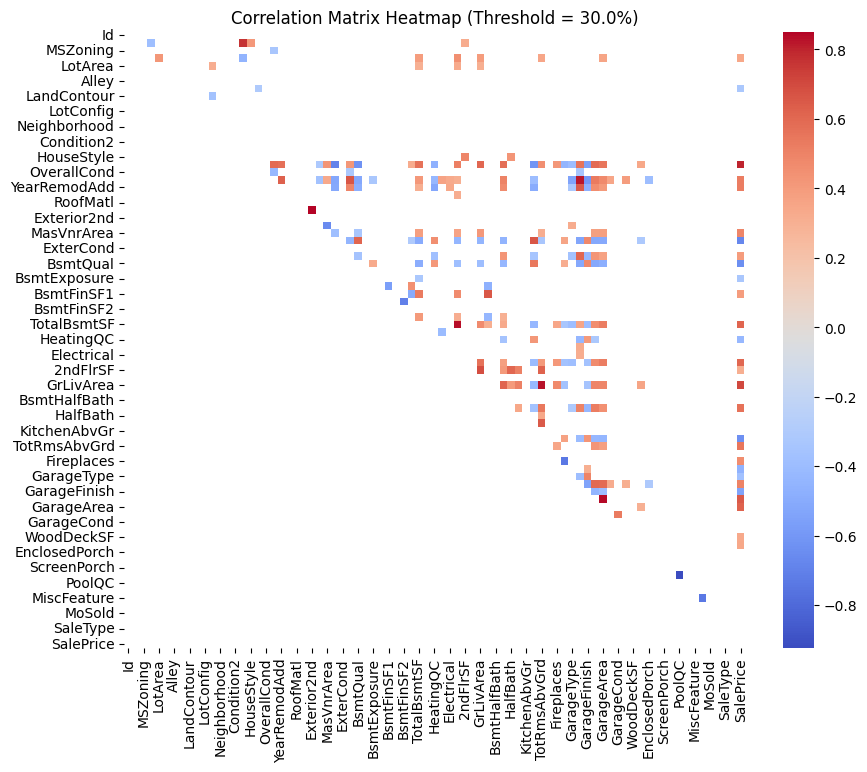

In [15]:
correlation_matrix = data.corr()

# Setting the correlation threshold
threshold = 0.30

# Creating a mask to display only correlations above the threshold
mask = np.triu(np.abs(correlation_matrix) >= threshold, k=1)

# Creating a heatmap with the "coolwarm" color palette
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, mask=~mask)
plt.title(f"Correlation Matrix Heatmap (Threshold = {threshold*100}%)")
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches="tight")

plt.show()

### The relevant feature names with their correlation percentages

In [16]:
# Getting the correlations between features and the target variable, "SalePrice"
correlations_with_target = correlation_matrix['SalePrice']

# Filtering for features 
relevant_features = correlations_with_target[correlations_with_target >= threshold]

# Creating a list of tuples with feature names and their correlation percentages
correlation_tuples = [(feature, round(correlation * 100, 2)) for feature, correlation in relevant_features.items() if feature != 'SalePrice']

# Sorting the list by correlation percentages in descending order
correlation_tuples.sort(key=lambda x: x[1], reverse=True)

# the sorted relevant feature names with their correlation percentages
print("Features with correlations >= 30% with SalePrice (sorted):")
for feature, correlation_percentage in correlation_tuples:
    print(f"{feature}: {correlation_percentage}%")

Features with correlations >= 30% with SalePrice (sorted):
OverallQual: 79.79%
GrLivArea: 70.52%
GarageCars: 64.7%
GarageArea: 61.93%
TotalBsmtSF: 61.56%
1stFlrSF: 60.8%
FullBath: 56.66%
TotRmsAbvGrd: 54.71%
YearBuilt: 52.54%
YearRemodAdd: 52.13%
GarageYrBlt: 50.48%
MasVnrArea: 48.87%
Fireplaces: 46.19%
Foundation: 39.89%
BsmtFinSF1: 39.03%
LotFrontage: 34.43%
OpenPorchSF: 34.34%
WoodDeckSF: 33.69%
2ndFlrSF: 30.69%


<a id="Outlier_detection"></a>
## Outlier detection(Normality test)

In [17]:
def detect_outliers(data, threshold=1.5):
    outliers = None
    total_outliers = 0
    
    if pd.api.types.is_numeric_dtype(data):
        alpha = 0.05
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            stat, p = stats.shapiro(data.dropna())

        if p > alpha:
            # Normal distribution, using Z-score method (Shapiro-Wilk test)
            z_scores = np.abs(stats.zscore(data))
            column_outliers = data[z_scores > threshold]
        else:
            # Non-normal distribution, use Tukey's method
            q1 = np.percentile(data, 25)
            q3 = np.percentile(data, 75)
            iqr = q3 - q1
            lower_bound = q1 - threshold * iqr
            upper_bound = q3 + threshold * iqr
            column_outliers = data[(data < lower_bound) | (data > upper_bound)]
        
        if column_outliers is not None:
            outliers = column_outliers
            total_outliers += len(column_outliers)
    
    return outliers, total_outliers

In [18]:
def visualize_outliers(outliers):
    if outliers is not None:
        num_outliers = len(outliers.columns)
        num_rows = (num_outliers + 2) // 3  # Calculating the number of rows needed
        
        fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
        axs = axs.flatten()  # Flatten the axis array to iterate over it
        
        for i, column in enumerate(outliers.columns):
            ax = axs[i]
            ax.boxplot(outliers[column].values, showfliers=False)
            ax.scatter(range(1, len(outliers)+1), outliers[column].values, color='red', marker='o', label='Outliers')
            ax.set_xlabel('Columns')
            ax.set_ylabel('Values')
            ax.set_title(f'Outliers - {column}')
            ax.legend()
        
        # Remove any unused subplots
        for j in range(num_outliers, len(axs)):
            fig.delaxes(axs[j])
        
        plt.tight_layout()
        plt.show()
    else:
        print('No outliers detected.')

 <a id="Outlier_viz"></a>
### Visualizing outliers

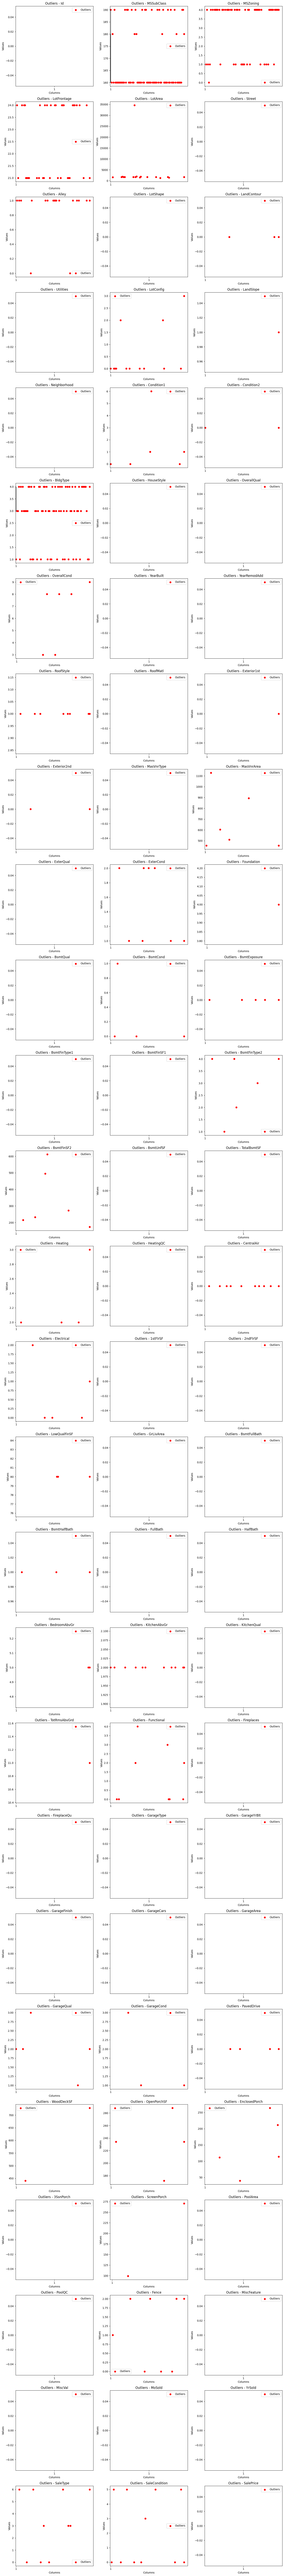

Number of total outliers: 4533


In [19]:
# Detect outliers for all numeric columns
all_outliers = pd.DataFrame()
total_outliers = 0
numeric_columns = data.select_dtypes(include=np.number).columns
for column in numeric_columns:
    column_data = data[column]
    column_outliers, column_total_outliers = detect_outliers(column_data)
    if column_outliers is not None:
        all_outliers[column] = column_outliers
        total_outliers += column_total_outliers

# Visualize outliers with a maximum of 3 graphs in a row
visualize_outliers(all_outliers)

# the number of total outliers in all columns
print("Number of total outliers:", total_outliers)

<a id="Feature_Engineering"></a>
# 3. Feature Engineering

<a id="Feature_Engineering"></a>
### Checking if transformation is needed

In [20]:
#Function to check whether transformation is needed or not.

def check_transformation_needed(data):
    for column in data.columns:
        original_skewness = data[column].skew()
        transformed_skewness = np.log1p(data[column]).skew()
        if transformed_skewness < original_skewness:
            print(f"Transformation recommended for column: {column}")
        else:
            print(f"No transformation needed for column: {column}")


In [21]:
# Checking if transformation is needed
check_transformation_needed(data)

Transformation recommended for column: Id
Transformation recommended for column: MSSubClass
Transformation recommended for column: MSZoning
Transformation recommended for column: LotFrontage
Transformation recommended for column: LotArea
No transformation needed for column: Street
Transformation recommended for column: Alley
Transformation recommended for column: LotShape
Transformation recommended for column: LandContour
No transformation needed for column: Utilities
Transformation recommended for column: LotConfig
Transformation recommended for column: LandSlope
Transformation recommended for column: Neighborhood
Transformation recommended for column: Condition1
Transformation recommended for column: Condition2
Transformation recommended for column: BldgType
Transformation recommended for column: HouseStyle
Transformation recommended for column: OverallQual
Transformation recommended for column: OverallCond
Transformation recommended for column: YearBuilt
Transformation recommended f

<a id="Transformation"></a>
## Transformation

In [22]:
# transformation

# numeric columns for transformation
columns_to_analyze = data.select_dtypes(include=np.number).columns

# Standardization
scaler = StandardScaler()
data[columns_to_analyze] = scaler.fit_transform(data[columns_to_analyze])

# Normalization
minmax_scaler = MinMaxScaler()
data[columns_to_analyze] = minmax_scaler.fit_transform(data[columns_to_analyze])

### Visualization before and after transformation

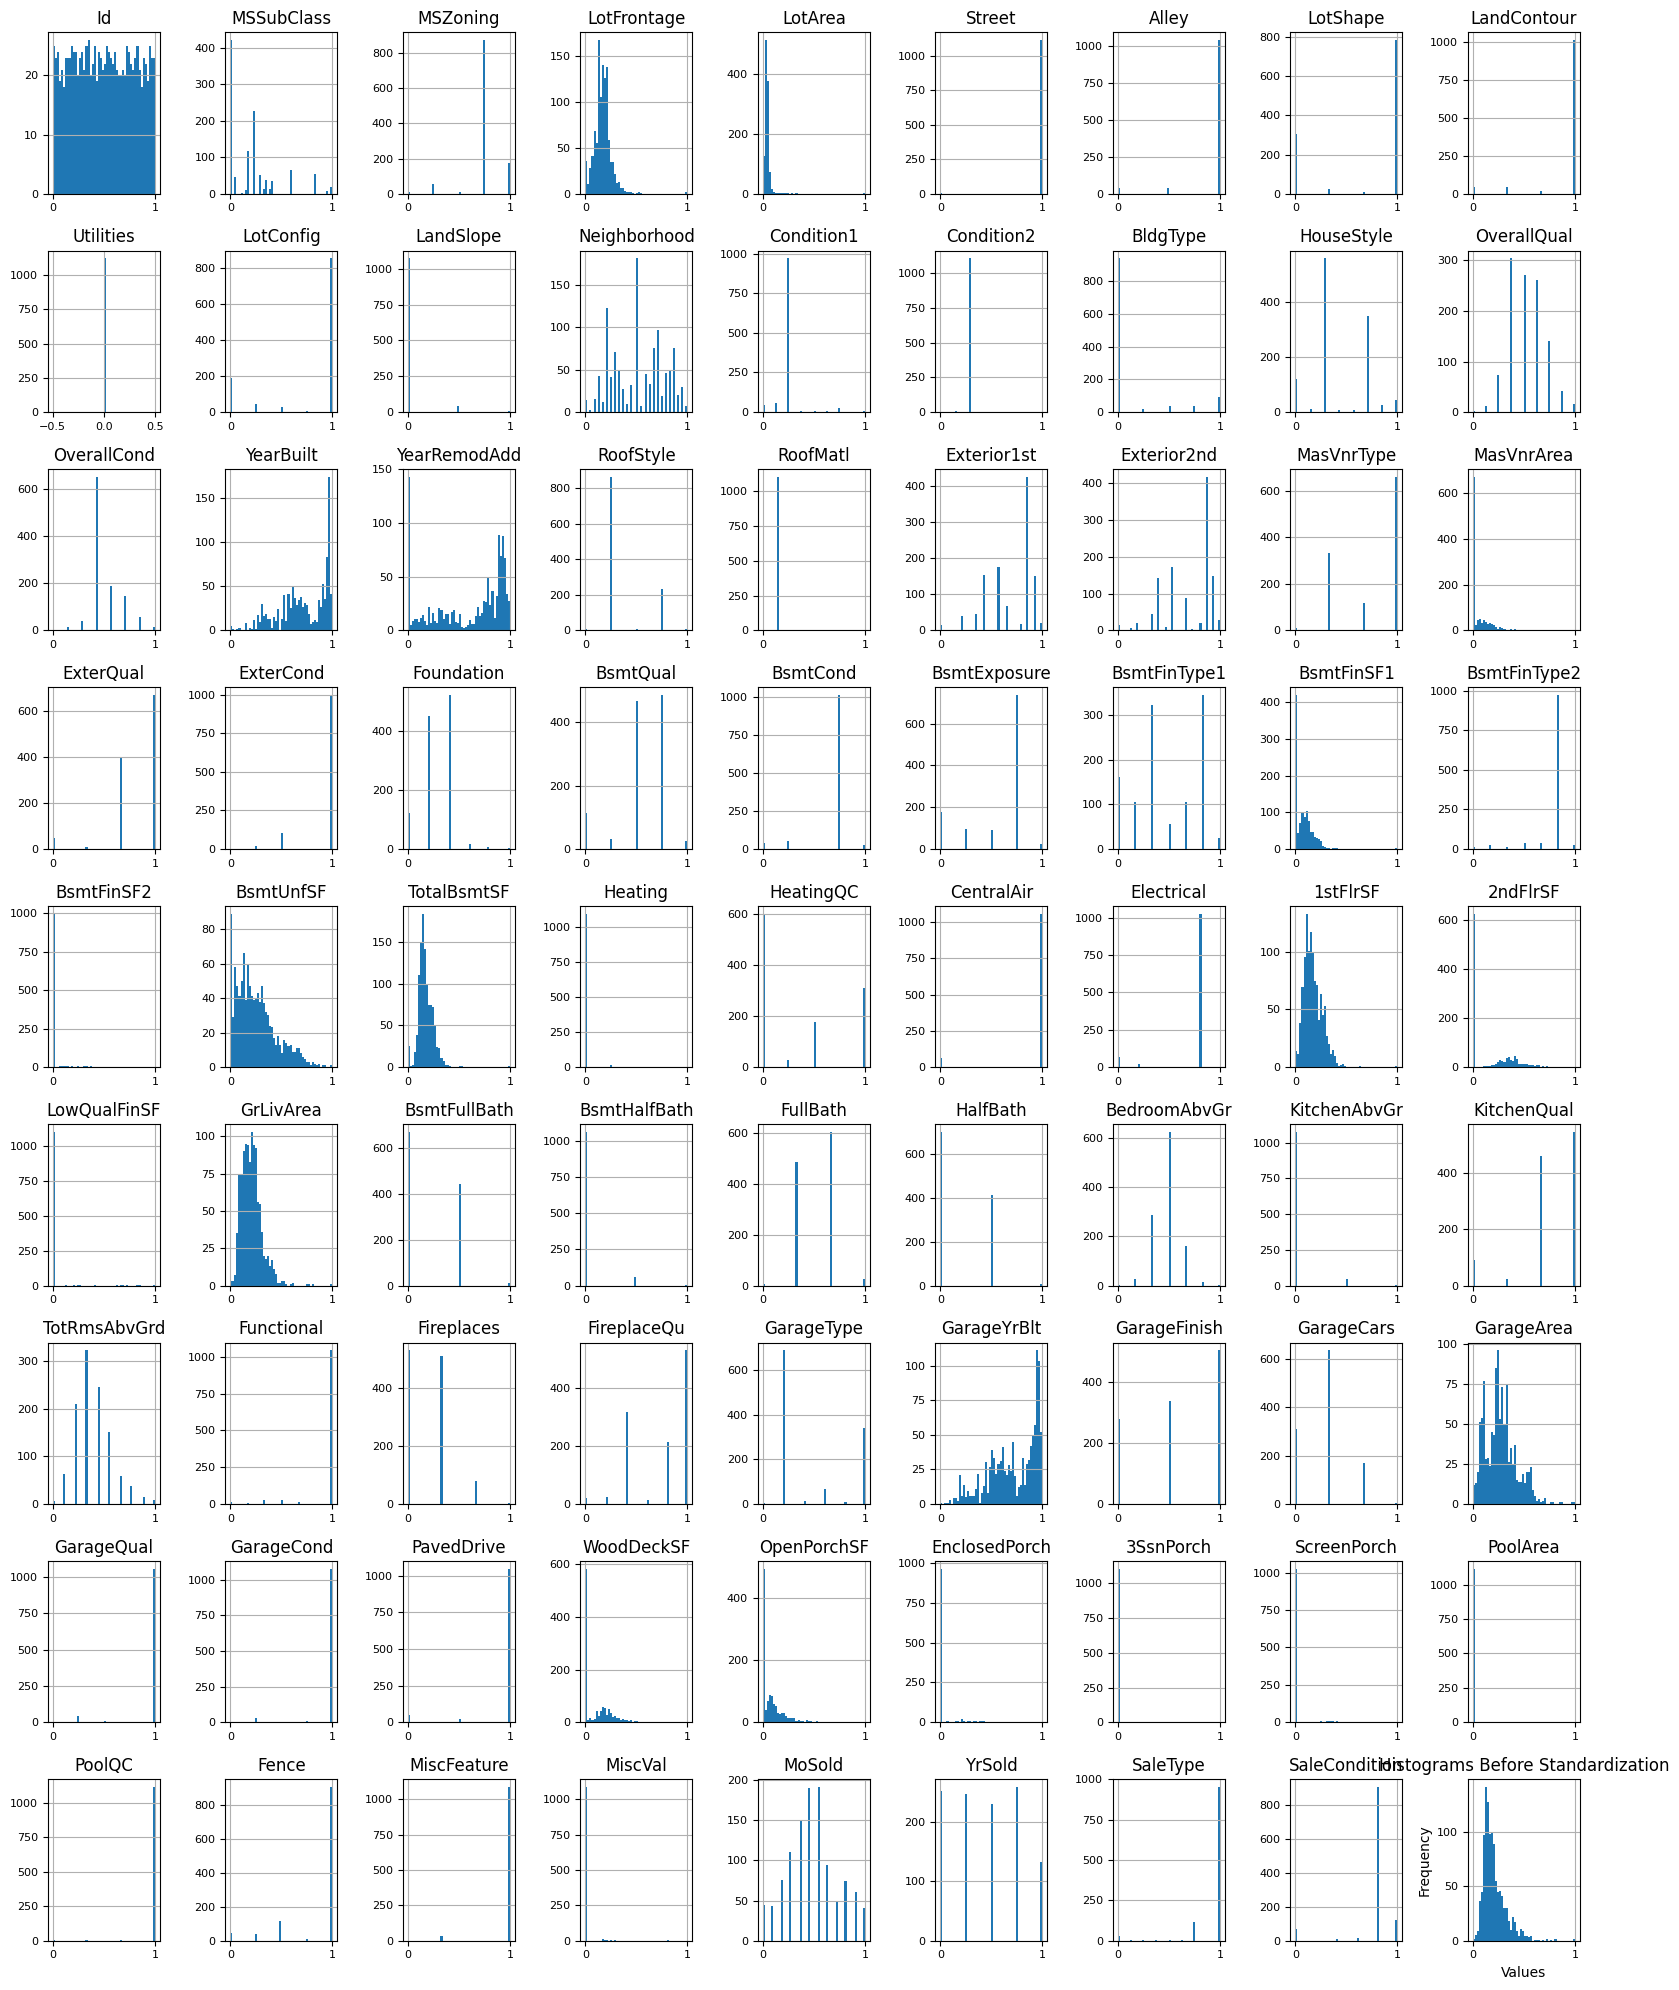

After standardization


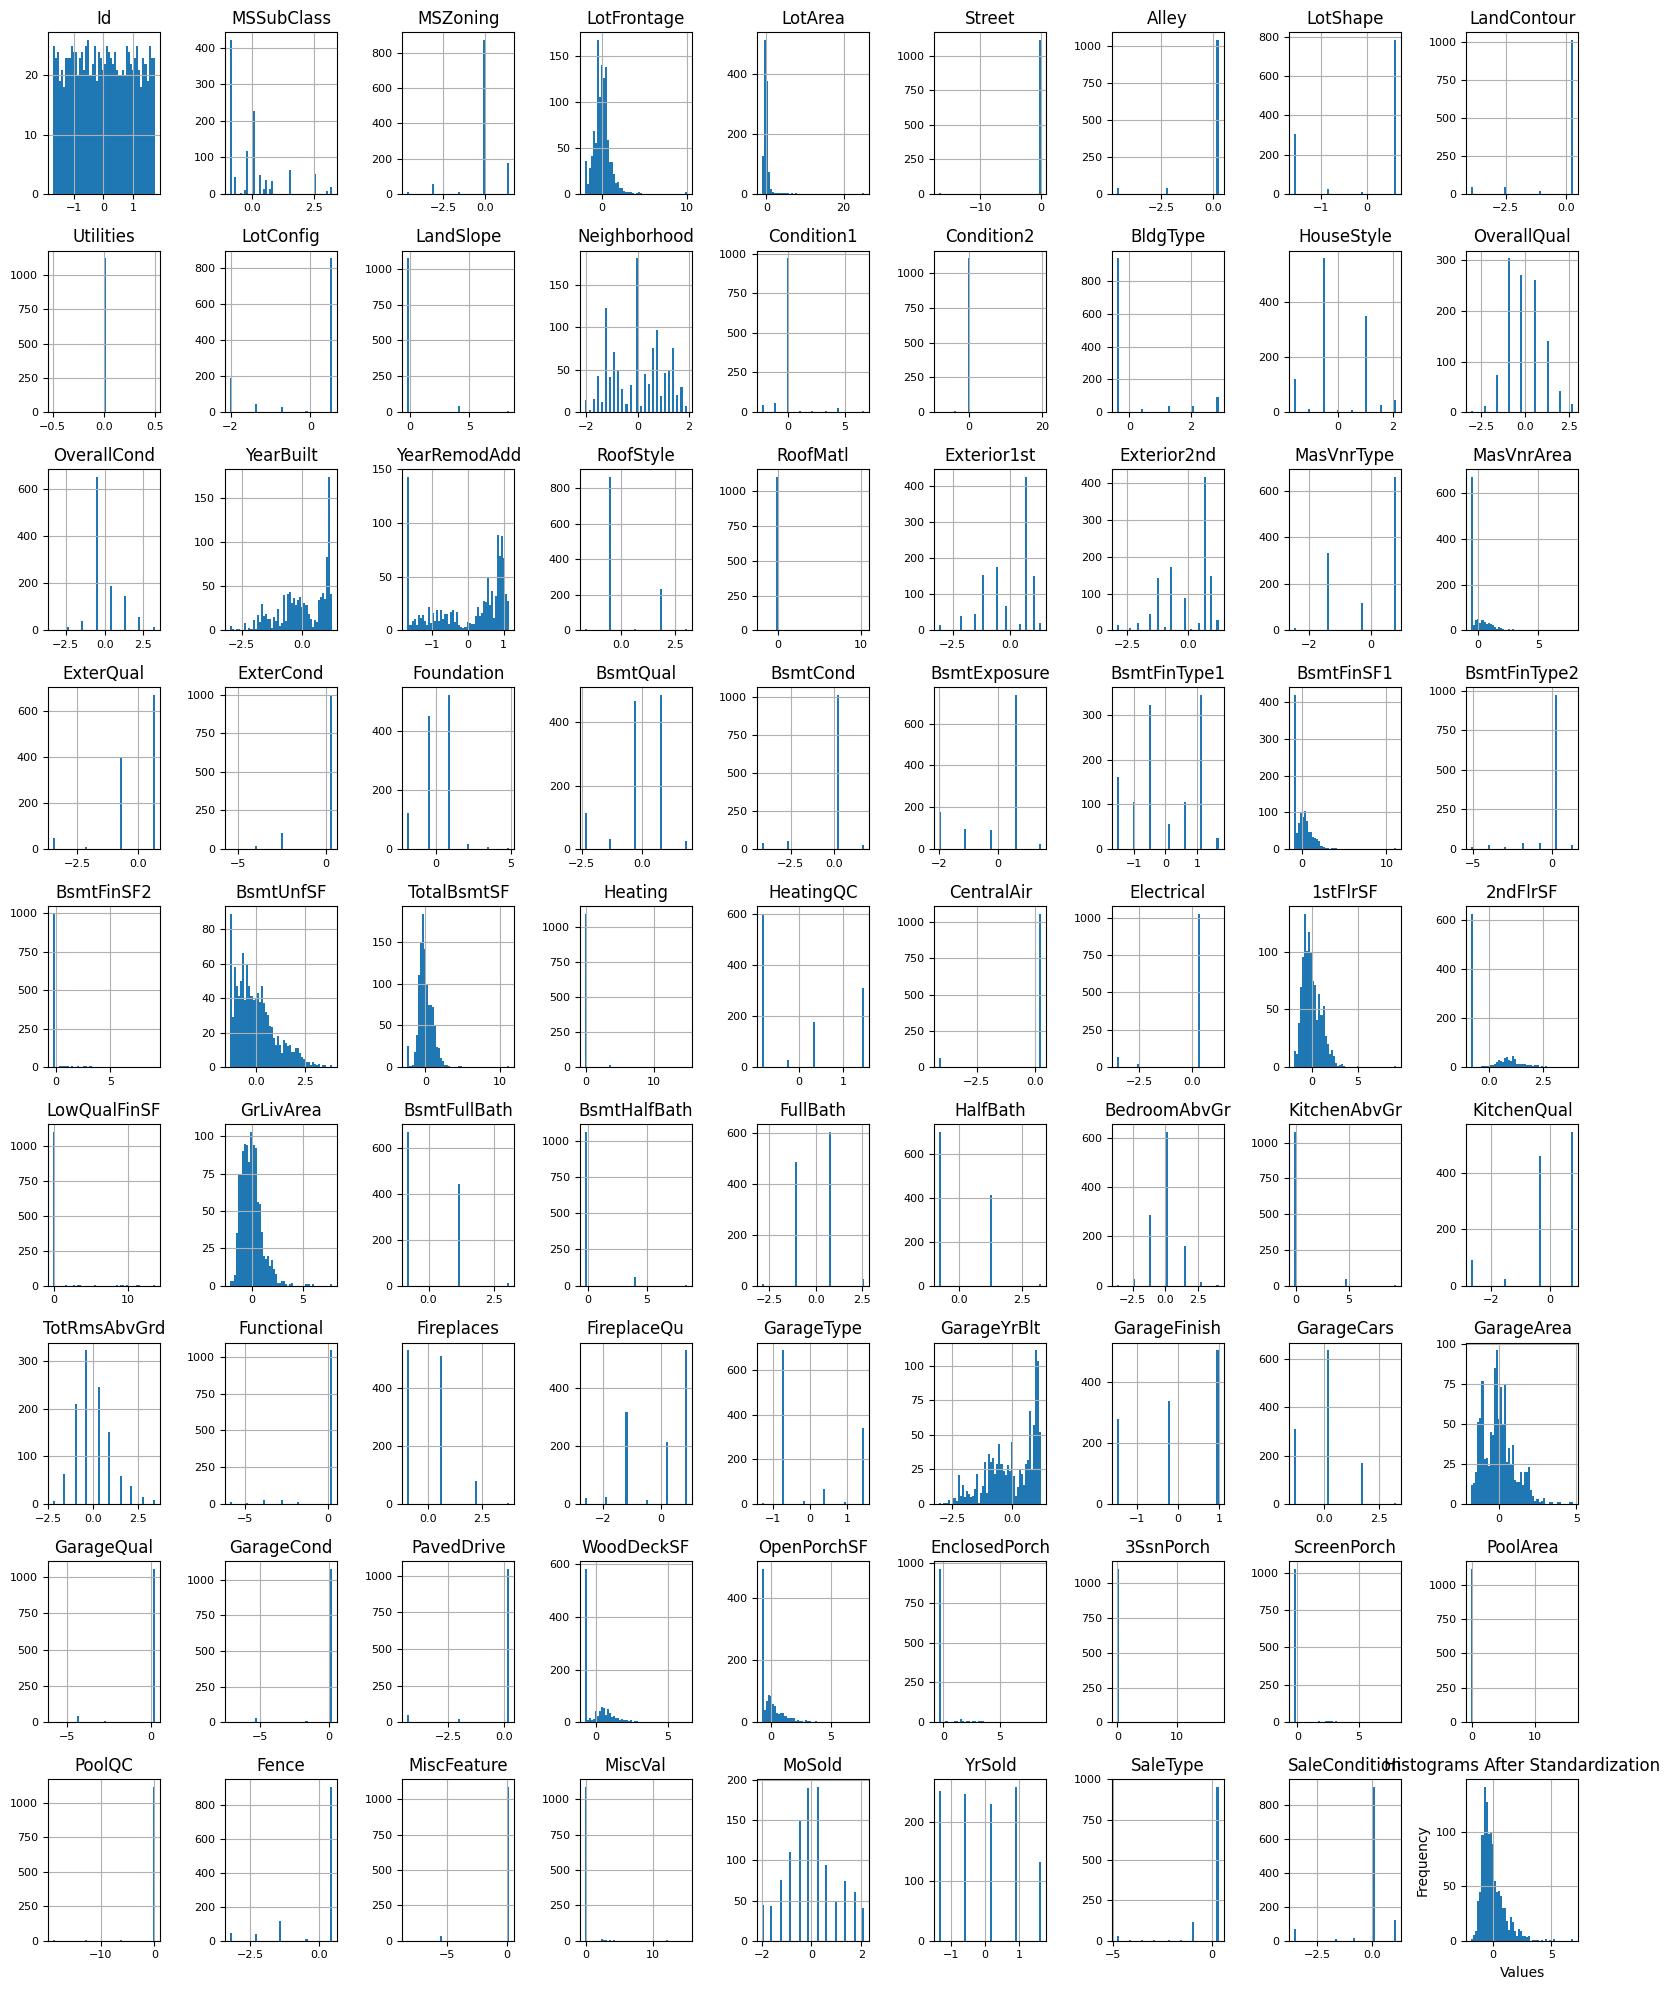

In [23]:
# Histograms before standardization
data[columns_to_analyze].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.title("Histograms Before Standardization")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Standardization
scaler = StandardScaler()
data[columns_to_analyze] = scaler.fit_transform(data[columns_to_analyze])

print("After standardization")

# Histograms after standardizati

data[columns_to_analyze].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.title("Histograms After Standardization")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

<a id="Feature_importance"></a>
### Feature importance Analysis

In [24]:
# Split the data into features and target variable
X = data.drop("SalePrice", axis=1)
y = data["SalePrice"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can proceed with training the Random Forest model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Match feature importances with feature names
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df

Feature  Importance
17   OverallQual    0.630163
46     GrLivArea    0.084310
44      2ndFlrSF    0.029563
38   TotalBsmtSF    0.027612
34    BsmtFinSF1    0.024826
..           ...         ...
22      RoofMatl    0.000029
45  LowQualFinSF    0.000025
74   MiscFeature    0.000017
5         Street    0.000004
9      Utilities    0.000000

[80 rows x 2 columns]

### The correlation matrix of  important features

In [25]:
important_features = ["OverallQual", "GrLivArea", "TotalBsmtSF", "1stFlrSF", "GarageArea", "MasVnrArea", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd", "BsmtQual", "GarageYrBlt", "FullBath", "Fireplaces", "FireplaceQu", "GarageFinish", "GarageCars", "KitchenQual", "ExterQual"]

# Creating a subset of the dataset with important features and target variable
subset_data = data[important_features + ["SalePrice"]]

# the correlation matrix of important features
correlation_matrix = subset_data.corr()
correlation_matrix

OverallQual  GrLivArea  TotalBsmtSF  1stFlrSF  GarageArea  \
OverallQual      1.000000   0.607466     0.563960  0.514453    0.550659   
GrLivArea        0.607466   1.000000     0.464645  0.561372    0.487550   
TotalBsmtSF      0.563960   0.464645     1.000000  0.835999    0.522051   
1stFlrSF         0.514453   0.561372     0.835999  1.000000    0.521183   
GarageArea       0.550659   0.487550     0.522051  0.521183    1.000000   
MasVnrArea       0.423988   0.414024     0.384434  0.363209    0.382162   
TotRmsAbvGrd     0.451008   0.824312     0.283676  0.405314    0.381930   
YearBuilt        0.589385   0.204967     0.409134  0.308875    0.471286   
YearRemodAdd     0.570757   0.290050     0.308696  0.281436    0.407471   
BsmtQual        -0.630591  -0.390503    -0.489335 -0.388201   -0.483537   
GarageYrBlt      0.560425   0.243734     0.352877  0.279053    0.592635   
FullBath         0.576875   0.614887     0.330119  0.374519    0.445241   
Fireplaces       0.415294   0.471060     0.347730  0.410144    0.216551   
FireplaceQu     -0.446580  -0.366913    -0.334908 -0.363557   -0.255422   
GarageFinish    -0.555829  -0.348473    -0.400034 -0.366668   -0.397008   
GarageCars       0.593803   0.494631     0.459657  0.468757    0.839415   
KitchenQual     -0.614261  -0.420679    -0.434611 -0.406917   -0.441749   
ExterQual       -0.695318  -0.447799    -0.501722 -0.442810   -0.510037   
SalePrice        0.797881   0.705154     0.615612  0.607969    0.619330   

              MasVnrArea  TotRmsAbvGrd  YearBuilt  YearRemodAdd  BsmtQual  \
OverallQual     0.423988      0.451008   0.589385      0.570757 -0.630591   
GrLivArea       0.414024      0.824312   0.204967      0.290050 -0.390503   
TotalBsmtSF     0.384434      0.283676   0.409134      0.308696 -0.489335   
1stFlrSF        0.363209      0.405314   0.308875      0.281436 -0.388201   
GarageArea      0.382162      0.381930   0.471286      0.407471 -0.483537   
MasVnrArea      1.000000      0.315604   0.332190      0.193376 -0.335866   
TotRmsAbvGrd    0.315604      1.000000   0.121417      0.181995 -0.282973   
YearBuilt       0.332190      0.121417   1.000000      0.623171 -0.520419   
YearRemodAdd    0.193376      0.181995   0.623171      1.000000 -0.485361   
BsmtQual       -0.335866     -0.282973  -0.520419     -0.485361  1.000000   
GarageYrBlt     0.277095      0.167207   0.823520      0.645808 -0.518772   
FullBath        0.285561      0.540449   0.500495      0.467563 -0.432038   
Fireplaces      0.252525      0.352048   0.133077      0.125898 -0.234282   
FireplaceQu    -0.247746     -0.290776  -0.171056     -0.199362  0.312030   
GarageFinish   -0.291437     -0.259309  -0.597593     -0.472998  0.478002   
GarageCars      0.375269      0.423963   0.532563      0.462663 -0.513912   
KitchenQual    -0.286992     -0.298012  -0.399356     -0.493536  0.541810   
ExterQual      -0.388854     -0.336642  -0.526268     -0.509891  0.611675   
SalePrice       0.488658      0.547067   0.525394      0.521253 -0.639803   

              GarageYrBlt  FullBath  Fireplaces  FireplaceQu  GarageFinish  \
OverallQual      0.560425  0.576875    0.415294    -0.446580     -0.555829   
GrLivArea        0.243734  0.614887    0.471060    -0.366913     -0.348473   
TotalBsmtSF      0.352877  0.330119    0.347730    -0.334908     -0.400034   
1stFlrSF         0.279053  0.374519    0.410144    -0.363557     -0.366668   
GarageArea       0.592635  0.445241    0.216551    -0.255422     -0.397008   
MasVnrArea       0.277095  0.285561    0.252525    -0.247746     -0.291437   
TotRmsAbvGrd     0.167207  0.540449    0.352048    -0.290776     -0.259309   
YearBuilt        0.823520  0.500495    0.133077    -0.171056     -0.597593   
YearRemodAdd     0.645808  0.467563    0.125898    -0.199362     -0.472998   
BsmtQual        -0.518772 -0.432038   -0.234282     0.312030      0.478002   
GarageYrBlt      1.000000  0.499730    0.064579    -0.135930     -0.542386   
FullBath         0.499730  1.000000 

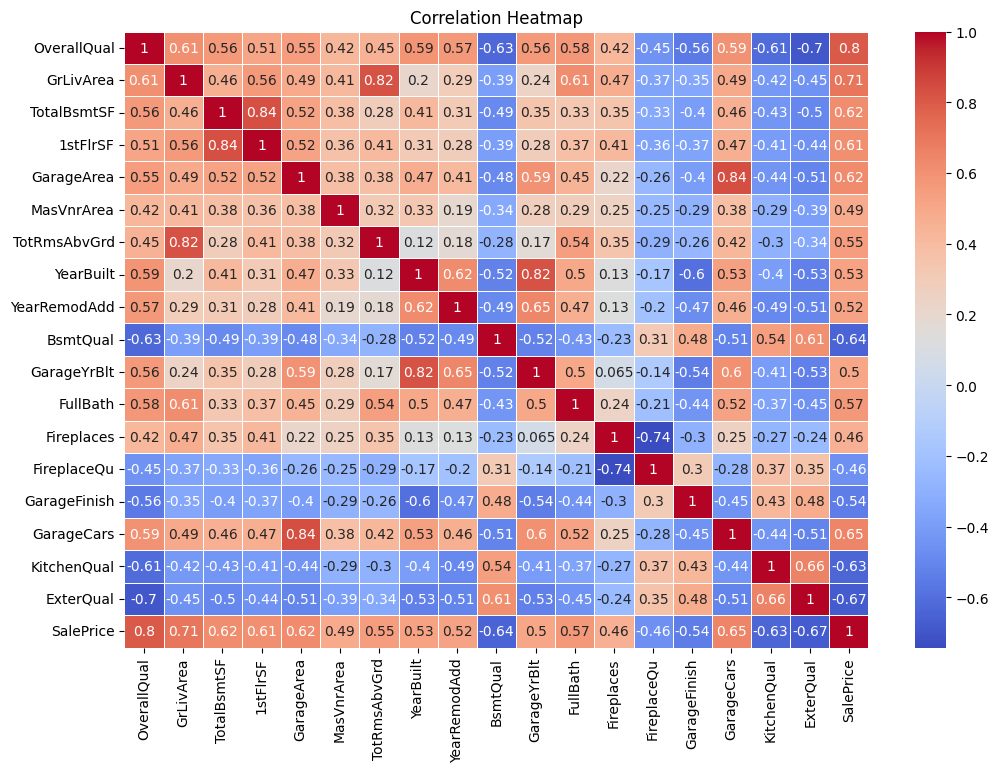

In [26]:
# A heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### The feature names and their correlations with "SalePrice"

In [27]:
# Get correlations with "SalePrice" and sort them in descending order
target_correlations = correlation_matrix["SalePrice"].abs().sort_values(ascending=False)

# Print the feature names and their correlations with "SalePrice"
print("Correlations with SalePrice:")
for feature, correlation in target_correlations.items():
    print(f"{feature}: {correlation:.4f}")

Correlations with SalePrice:
SalePrice: 1.0000
OverallQual: 0.7979
GrLivArea: 0.7052
ExterQual: 0.6744
GarageCars: 0.6470
BsmtQual: 0.6398
KitchenQual: 0.6340
GarageArea: 0.6193
TotalBsmtSF: 0.6156
1stFlrSF: 0.6080
FullBath: 0.5666
TotRmsAbvGrd: 0.5471
GarageFinish: 0.5441
YearBuilt: 0.5254
YearRemodAdd: 0.5213
GarageYrBlt: 0.5048
MasVnrArea: 0.4887
Fireplaces: 0.4619
FireplaceQu: 0.4598


### Visualizing important features

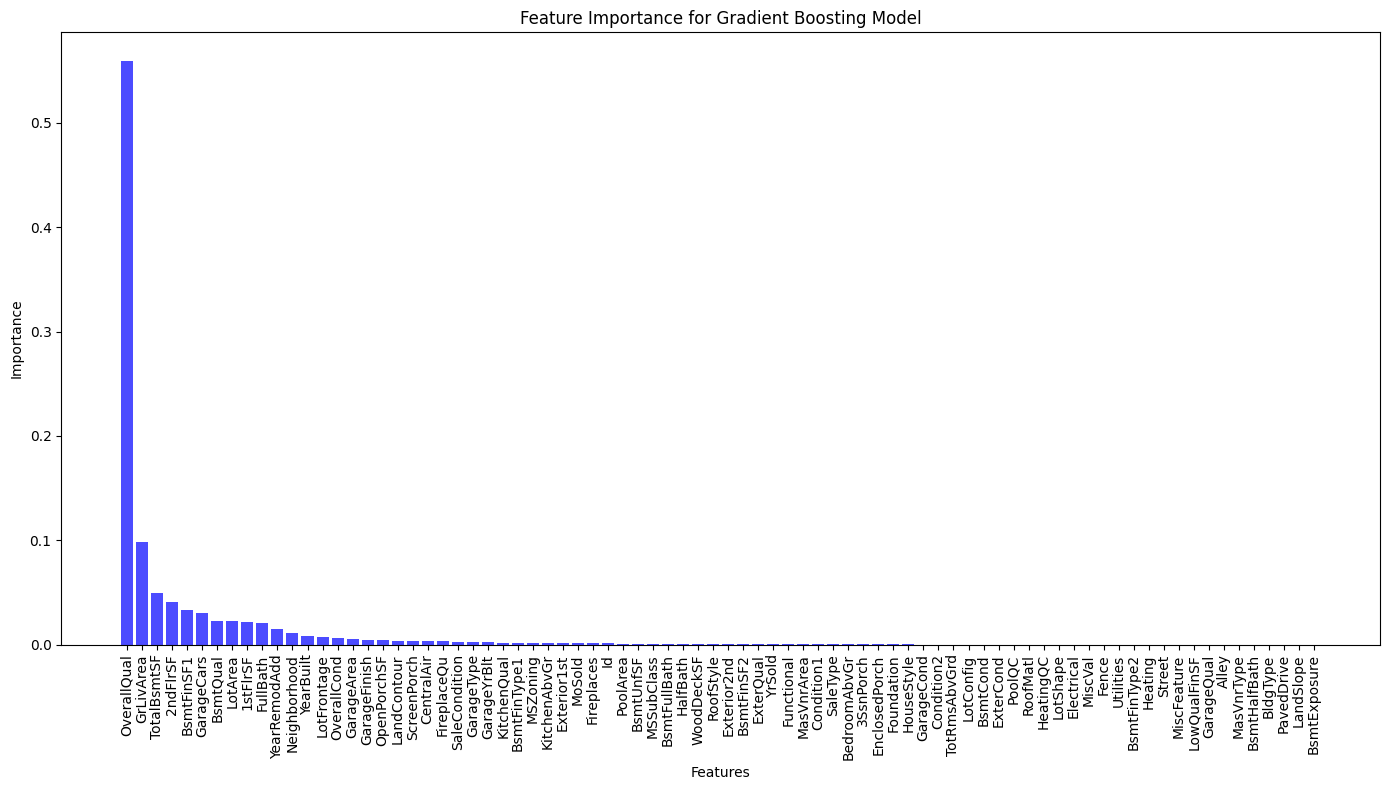

In [28]:
# Get feature importances
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
feature_importances = gb_model.feature_importances_

# Match feature importances with feature names
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(14, 8))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='b', alpha=0.7)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Gradient Boosting Model')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

In [29]:
importance_df

Feature  Importance
17   OverallQual    0.558900
46     GrLivArea    0.097934
38   TotalBsmtSF    0.049335
44      2ndFlrSF    0.040575
34    BsmtFinSF1    0.033154
..           ...         ...
48  BsmtHalfBath    0.000000
15      BldgType    0.000000
65    PavedDrive    0.000000
11     LandSlope    0.000000
32  BsmtExposure    0.000000

[80 rows x 2 columns]

<a id="Feature_Selection"></a>
## Feature Selection and visualization

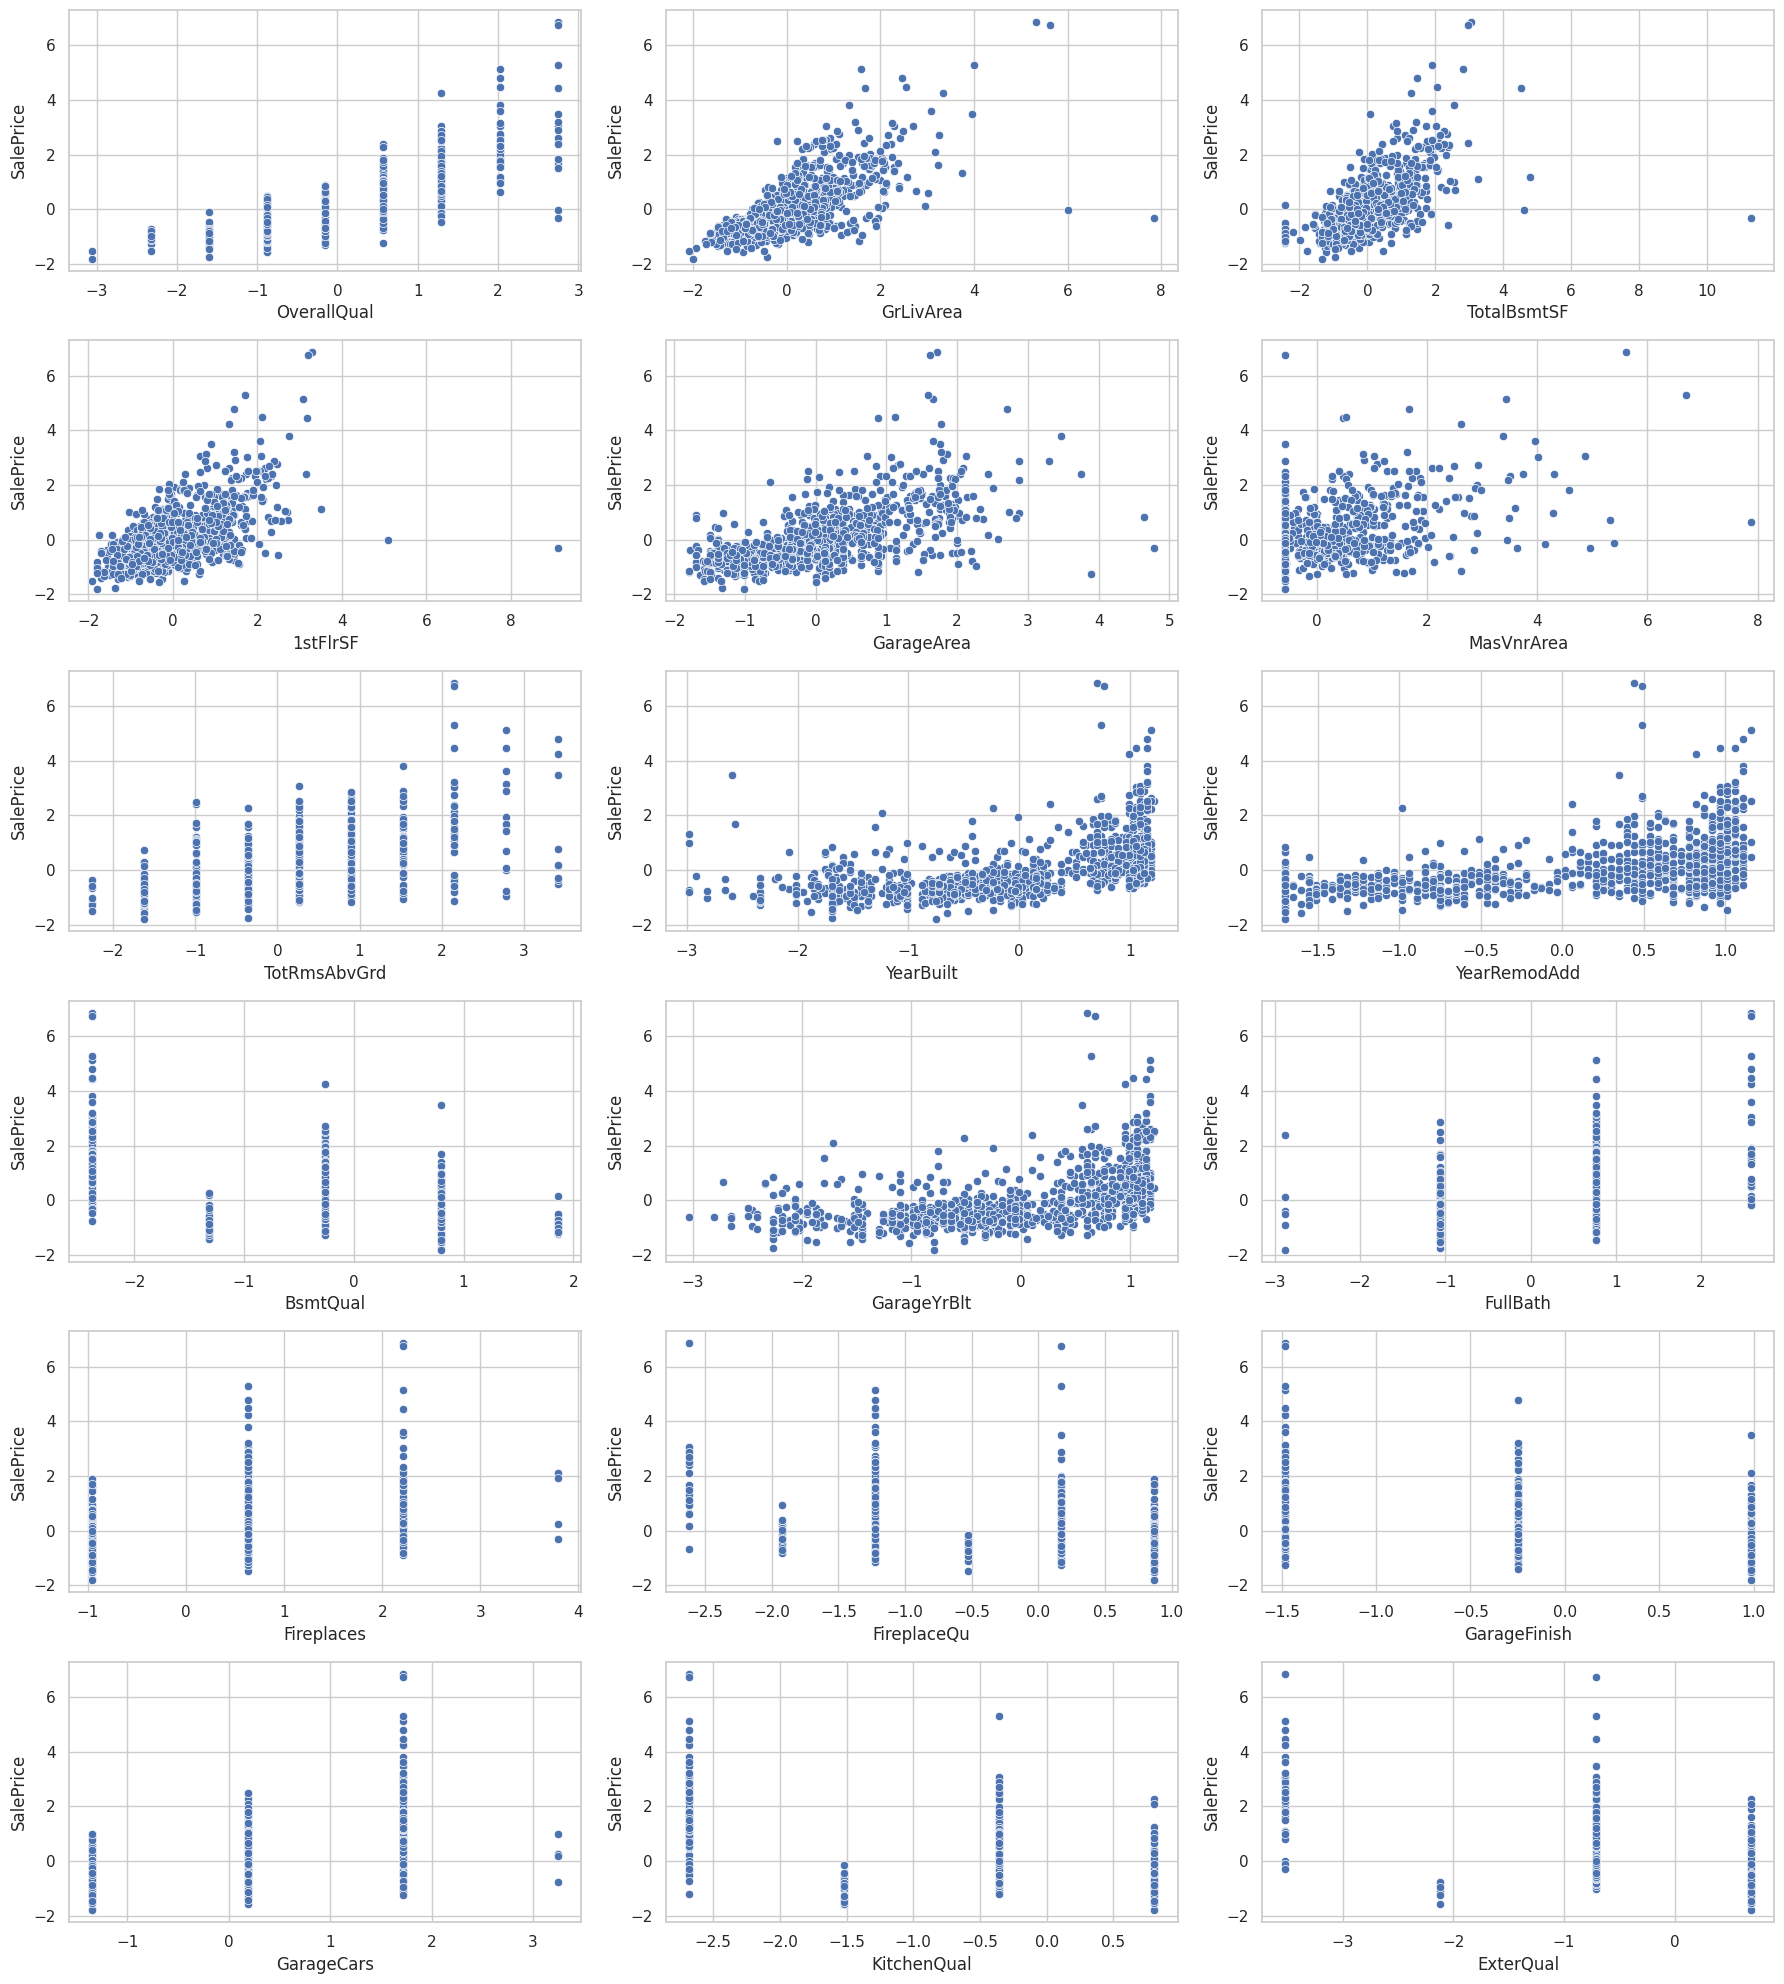

In [30]:
# Subset the data with the selected important features and SalePrice
subset_data = data[important_features + ["SalePrice"]]

# Setting the style of the plots (optional but can make the plots look nicer)
sns.set(style="whitegrid")

num_plots = len(important_features)
num_cols = 3
num_rows = -(-num_plots // num_cols) 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 20))

axes = axes.flatten() if num_rows > 1 else [axes]
for i, feature in enumerate(important_features):
    sns.scatterplot(x=feature, y="SalePrice", data=subset_data, ax=axes[i])

plt.tight_layout()
plt.show()

### Feature seleciton: 25 best features

In [31]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn the relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# Set the random seed for reproducibility
random_state = 42

# Split the data into features and target variable
X = data.drop("SalePrice", axis=1)
y = data["SalePrice"]

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

In [32]:
fs.scores_

array([2.94184049e+00, 7.61739348e+00, 2.69072016e+01, 1.40524664e+02,
       7.09962546e+01, 7.75044124e-01, 1.57280179e+01, 8.52075374e+01,
       1.97953249e-04, 0.00000000e+00, 6.11116302e+00, 1.11755020e+00,
       5.82172689e+01, 6.24069444e+00, 1.55310085e-02, 4.81421992e+00,
       2.52260270e+01, 1.56481110e+03, 1.81668965e+01, 3.21810365e+02,
       3.05654361e+02, 5.71042830e+01, 2.55945616e+01, 1.07327756e+01,
       1.05316401e+01, 6.22906153e+01, 2.76342975e+02, 7.06313676e+02,
       1.11022932e+01, 1.64192115e+02, 6.45168863e+02, 8.34272914e-01,
       1.15313002e+02, 5.60571935e+00, 1.49366307e+02, 3.23461532e-01,
       2.17627574e-01, 4.85245471e+01, 5.43597003e+02, 5.83672932e+00,
       2.05169597e+02, 3.68987548e+01, 5.19892229e+01, 5.44577891e+02,
       8.68375665e+01, 8.45531661e-03, 8.34554387e+02, 5.00510389e+01,
       1.04636625e+00, 3.95906708e+02, 6.50063513e+01, 1.94116870e+01,
       1.86409630e+01, 6.24516277e+02, 3.60350689e+02, 1.34774259e+01,
      

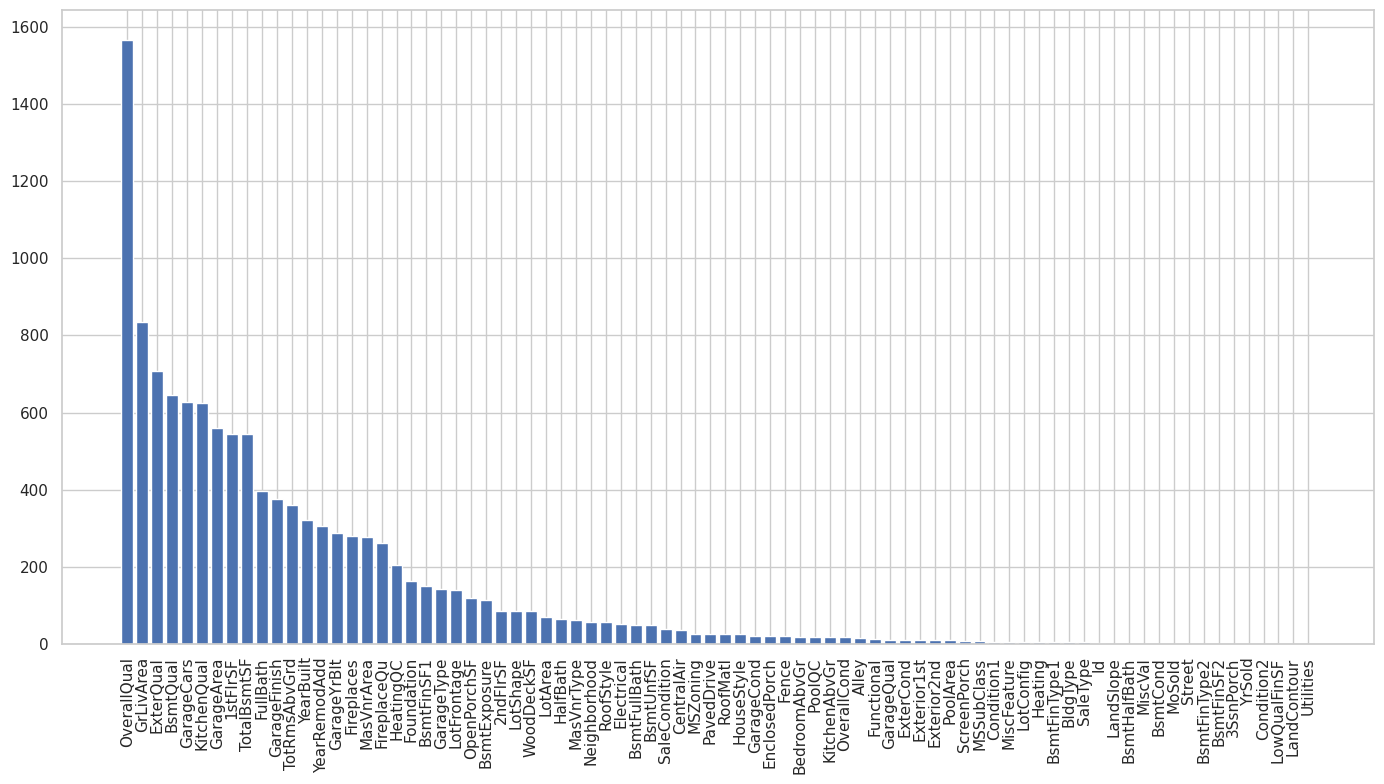

In [33]:
feature_names = fs.feature_names_in_
scores = fs.scores_

# Sort feature names and scores in descending order of scores
sorted_feature_names, sorted_scores = zip(*sorted(zip(feature_names, scores), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(14, 8))  
plt.bar(sorted_feature_names, sorted_scores)
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

In [34]:
important_features = sorted_feature_names[:25]
print("Best 25 Features:")
print(important_features)

Best 25 Features:
('OverallQual', 'GrLivArea', 'ExterQual', 'BsmtQual', 'GarageCars', 'KitchenQual', 'GarageArea', '1stFlrSF', 'TotalBsmtSF', 'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'Fireplaces', 'MasVnrArea', 'FireplaceQu', 'HeatingQC', 'Foundation', 'BsmtFinSF1', 'GarageType', 'LotFrontage', 'OpenPorchSF', 'BsmtExposure')


In [35]:
important_features=['OverallQual', 'GrLivArea', 'ExterQual', 'BsmtQual', 'GarageCars', 'KitchenQual', 'GarageArea', '1stFlrSF', 'TotalBsmtSF', 'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'Fireplaces', 'MasVnrArea', 'FireplaceQu', 'HeatingQC', 'Foundation', 'BsmtFinSF1', 'GarageType', 'LotFrontage', 'OpenPorchSF', 'BsmtExposure']

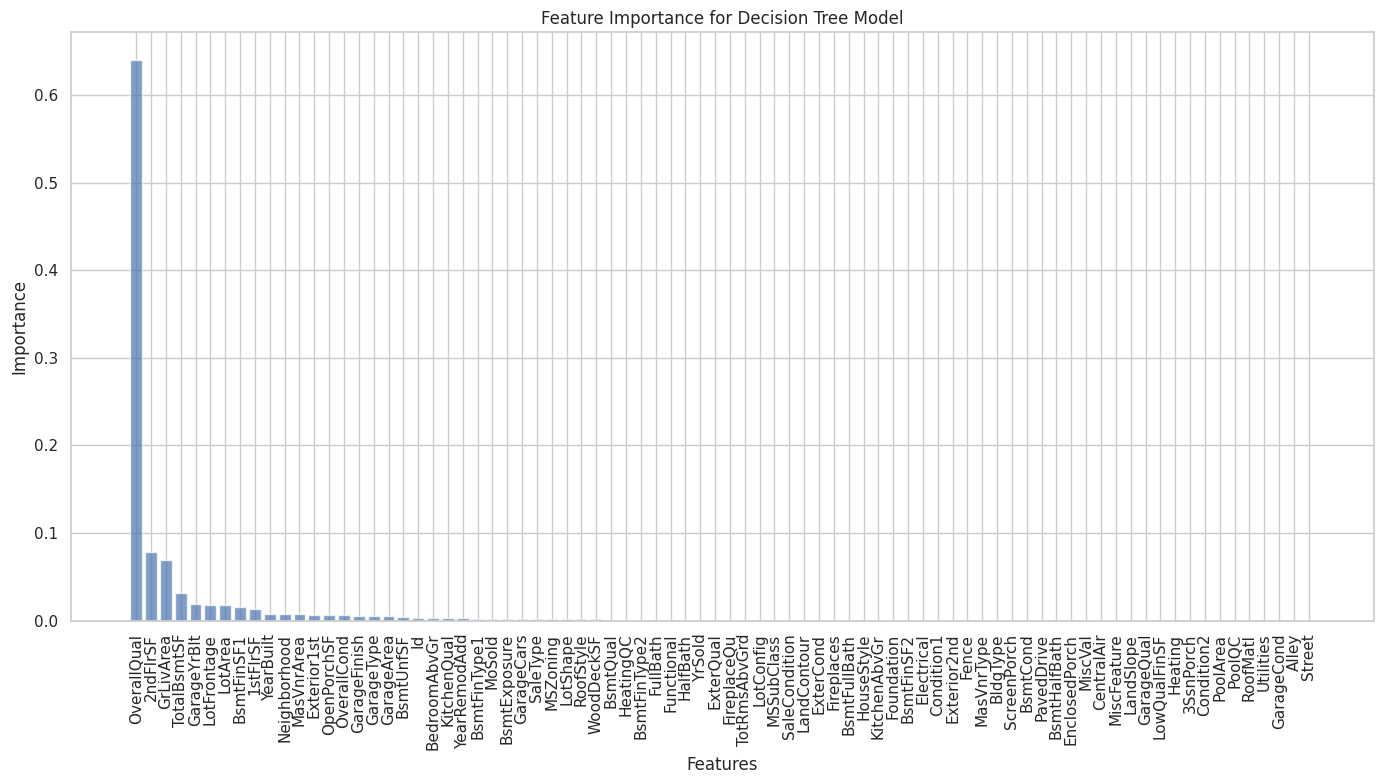

Best 25 Features:
['OverallQual', '2ndFlrSF', 'GrLivArea', 'TotalBsmtSF', 'GarageYrBlt', 'LotFrontage', 'LotArea', 'BsmtFinSF1', '1stFlrSF', 'YearBuilt', 'Neighborhood', 'MasVnrArea', 'Exterior1st', 'OpenPorchSF', 'OverallCond', 'GarageFinish', 'GarageType', 'GarageArea', 'BsmtUnfSF', 'Id', 'BedroomAbvGr', 'KitchenQual', 'YearRemodAdd', 'BsmtFinType1', 'MoSold']


In [36]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=random_state)

# Train the model
dt_model.fit(X_train, y_train)

# Get feature importances
feature_importances = dt_model.feature_importances_

# Match feature importances with feature names
feature_names = X_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(14, 8))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='b', alpha=0.7)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Decision Tree Model')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

# Get the top important features
important_features = importance_df['Feature'][:25].tolist()
print("Best 25 Features:")
print(important_features)

<a id="Feature_rankings"></a>
## Feature rankings

In [37]:
# Perform PCA to rank the features based on explained variance ratio
pca = PCA()
X_pca = pca.fit_transform(X)
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_df = pd.DataFrame({'Feature': X.columns, 'Explained Variance Ratio': explained_variance_ratio})

# Rank features using Random Forest
rf = RandomForestRegressor(random_state=random_state)
rf.fit(X, y)
feature_importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the feature importance dataframe in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# the feature rankings
print("Feature ranking using PCA - Explained Variance Ratio:")
print(explained_variance_df)
print("\nFeature ranking using Random Forest - Feature Importance:")
print(feature_importance_df)

Feature ranking using PCA - Explained Variance Ratio:
          Feature  Explained Variance Ratio
0              Id              1.461120e-01
1      MSSubClass              5.209002e-02
2        MSZoning              4.916540e-02
3     LotFrontage              3.829950e-02
4         LotArea              3.041505e-02
..            ...                       ...
75        MiscVal              9.492760e-04
76         MoSold              8.147203e-04
77         YrSold              2.881551e-32
78       SaleType              2.540954e-33
79  SaleCondition              3.496204e-34

[80 rows x 2 columns]

Feature ranking using Random Forest - Feature Importance:
         Feature    Importance
17   OverallQual  6.197154e-01
46     GrLivArea  9.220579e-02
44      2ndFlrSF  4.798618e-02
38   TotalBsmtSF  2.659597e-02
43      1stFlrSF  2.382251e-02
..           ...           ...
39       Heating  3.248807e-05
72        PoolQC  2.867918e-05
45  LowQualFinSF  2.026815e-05
5         Street  8.697575

<a id="Model"></a>
# 4.  Model Building and Evaluation

In [38]:
# Perform PCA to rank the features based on explained variance ratio
pca = PCA()
X_pca = pca.fit_transform(X_train)
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_df = pd.DataFrame({'Feature': X_train.columns, 'Explained Variance Ratio': explained_variance_ratio})

# Rank features using Random Forest
rf = RandomForestRegressor(random_state=random_state)
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Initialize different base models
linear_regression = LinearRegression()
decision_tree = DecisionTreeRegressor()
random_forest = RandomForestRegressor(random_state=random_state)
svr = SVR()
gradient_boosting = GradientBoostingRegressor()
ada_boost = AdaBoostRegressor()
ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()
knn = KNeighborsRegressor()
gaussian_process = GaussianProcessRegressor()

# Train each base model on the training set
linear_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svr.fit(X_train, y_train)
gradient_boosting.fit(X_train, y_train)
ada_boost.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)
elastic_net.fit(X_train, y_train)
knn.fit(X_train, y_train)
gaussian_process.fit(X_train, y_train)

# Evaluate the performance of each model on the test set
linear_rmse = mean_squared_error(y_test, linear_regression.predict(X_test), squared=False)
dt_rmse = mean_squared_error(y_test, decision_tree.predict(X_test), squared=False)
rf_rmse = mean_squared_error(y_test, random_forest.predict(X_test), squared=False)
svr_rmse = mean_squared_error(y_test, svr.predict(X_test), squared=False)
gb_rmse = mean_squared_error(y_test, gradient_boosting.predict(X_test), squared=False)
ada_rmse = mean_squared_error(y_test, ada_boost.predict(X_test), squared=False)
ridge_rmse = mean_squared_error(y_test, ridge.predict(X_test), squared=False)
lasso_rmse = mean_squared_error(y_test, lasso.predict(X_test), squared=False)
enet_rmse = mean_squared_error(y_test, elastic_net.predict(X_test), squared=False)
knn_rmse = mean_squared_error(y_test, knn.predict(X_test), squared=False)
gp_rmse = mean_squared_error(y_test, gaussian_process.predict(X_test), squared=False)

mae_linear = mean_absolute_error(y_test, linear_regression.predict(X_test))
mae_dt = mean_absolute_error(y_test, decision_tree.predict(X_test))
mae_rf = mean_absolute_error(y_test, random_forest.predict(X_test))
mae_svr = mean_absolute_error(y_test, svr.predict(X_test))
mae_gb = mean_absolute_error(y_test, gradient_boosting.predict(X_test))
mae_ada = mean_absolute_error(y_test, ada_boost.predict(X_test))
mae_ridge = mean_absolute_error(y_test, ridge.predict(X_test))
mae_lasso = mean_absolute_error(y_test, lasso.predict(X_test))
mae_enet = mean_absolute_error(y_test, elastic_net.predict(X_test))
mae_knn = mean_absolute_error(y_test, knn.predict(X_test))
mae_gp = mean_absolute_error(y_test, gaussian_process.predict(X_test))

r2_linear = r2_score(y_test, linear_regression.predict(X_test))
r2_dt = r2_score(y_test, decision_tree.predict(X_test))
r2_rf = r2_score(y_test, random_forest.predict(X_test))
r2_svr = r2_score(y_test, svr.predict(X_test))
r2_gb = r2_score(y_test, gradient_boosting.predict(X_test))
r2_ada = r2_score(y_test, ada_boost.predict(X_test))
r2_ridge = r2_score(y_test, ridge.predict(X_test))
r2_lasso = r2_score(y_test, lasso.predict(X_test))
r2_enet = r2_score(y_test, elastic_net.predict(X_test))
r2_knn = r2_score(y_test, knn.predict(X_test))
r2_gp = r2_score(y_test, gaussian_process.predict(X_test))

# Print the evaluation metrics for each model
print("Linear Regression RMSE:", linear_rmse)
print("Decision Tree RMSE:", dt_rmse)
print("Random Forest RMSE:", rf_rmse)
print("SVR RMSE:", svr_rmse)
print("Gradient Boosting RMSE:", gb_rmse)
print("AdaBoost RMSE:", ada_rmse)
print("Ridge RMSE:", ridge_rmse)
print("Lasso RMSE:", lasso_rmse)
print("ElasticNet RMSE:", enet_rmse)
print("KNN RMSE:", knn_rmse)
print("Gaussian Process RMSE:", gp_rmse)
print()
print("Linear Regression MAE:", mae_linear)
print("Decision Tree MAE:", mae_dt)
print("Random Forest MAE:", mae_rf)
print("SVR MAE:", mae_svr)
print("Gradient Boosting MAE:", mae_gb)
print("AdaBoost MAE:", mae_ada)
print("Ridge MAE:", mae_ridge)
print("Lasso MAE:", mae_lasso)
print("ElasticNet MAE:", mae_enet)
print("KNN MAE:", mae_knn)
print("Gaussian Process MAE:", mae_gp)
print()
print("Linear Regression R-squared:", r2_linear)
print("Decision Tree R-squared:", r2_dt)
print("Random Forest R-squared:", r2_rf)
print("SVR R-squared:", r2_svr)
print("Gradient Boosting R-squared:", r2_gb)
print("AdaBoost R-squared:", r2_ada)
print("Ridge R-squared:", r2_ridge)
print("Lasso R-squared:", r2_lasso)
print("ElasticNet R-squared:", r2_enet)
print("KNN R-squared:", r2_knn)
print("Gaussian Process R-squared:", r2_gp)

Linear Regression RMSE: 0.3499971634555374
Decision Tree RMSE: 0.4798472670701992
Random Forest RMSE: 0.36312351512291774
SVR RMSE: 0.38475721033338206
Gradient Boosting RMSE: 0.3243720721893465
AdaBoost RMSE: 0.41960595033085113
Ridge RMSE: 0.3498049274109907
Lasso RMSE: 0.9595863194506697
ElasticNet RMSE: 0.7781306319078584
KNN RMSE: 0.41462582751889077
Gaussian Process RMSE: 0.9579276541266011

Linear Regression MAE: 0.24654374177411656
Decision Tree MAE: 0.3048525049884379
Random Forest MAE: 0.2380652809891943
SVR MAE: 0.23511624743774184
Gradient Boosting MAE: 0.20753268988709936
AdaBoost MAE: 0.30466784125983803
Ridge MAE: 0.2463095386082997
Lasso MAE: 0.7341020833772043
ElasticNet MAE: 0.5852813491848606
KNN MAE: 0.2823258896950631
Gaussian Process MAE: 0.7295230622168355

Linear Regression R-squared: 0.8668472122919596
Decision Tree R-squared: 0.7497193550874965
Random Forest R-squared: 0.8566723561109904
SVR R-squared: 0.8390856599100562
Gradient Boosting R-squared: 0.88563105

<a id="best_Model"></a>
## The best model and interpretation

Based on the evaluation results, the Gradient Boosting model emerges as the best performer among the models considered. Here's the interpretation:

1. **Lowest RMSE and MAE**: The Gradient Boosting model achieved the lowest Root Mean Squared Error (RMSE) of approximately 0.325 and the lowest Mean Absolute Error (MAE) of approximately 0.208. These metrics indicate that, on average, the predictions are closer to the actual values compared to the other models.

2. **Highest R-squared (R²)**: The Gradient Boosting model achieved the highest R-squared value of approximately 0.885. This means that the model explains about 88.5% of the variance in the target variable, indicating a very good fit.

3. **Consistent Performance**: The Gradient Boosting model maintains good performance on both the training and test data. This suggests that it's not overfitting and can generalize well to unseen data.

In summary, the Gradient Boosting model is the preferred choice for this regression task, as it provides the most accurate predictions with the lowest error metrics and highest explained variance.

<a id="compare"></a>
### Model Evaluation and Comparison

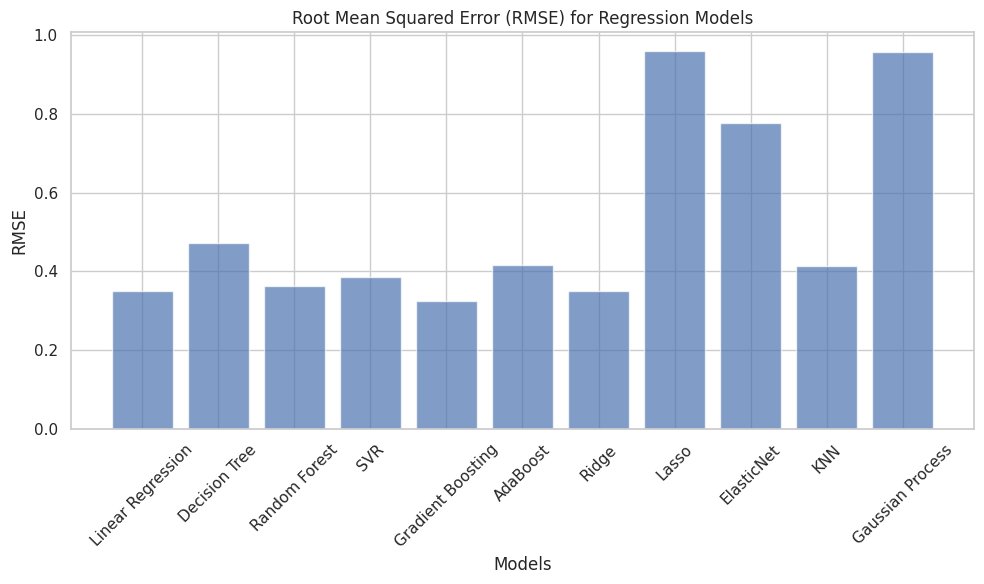

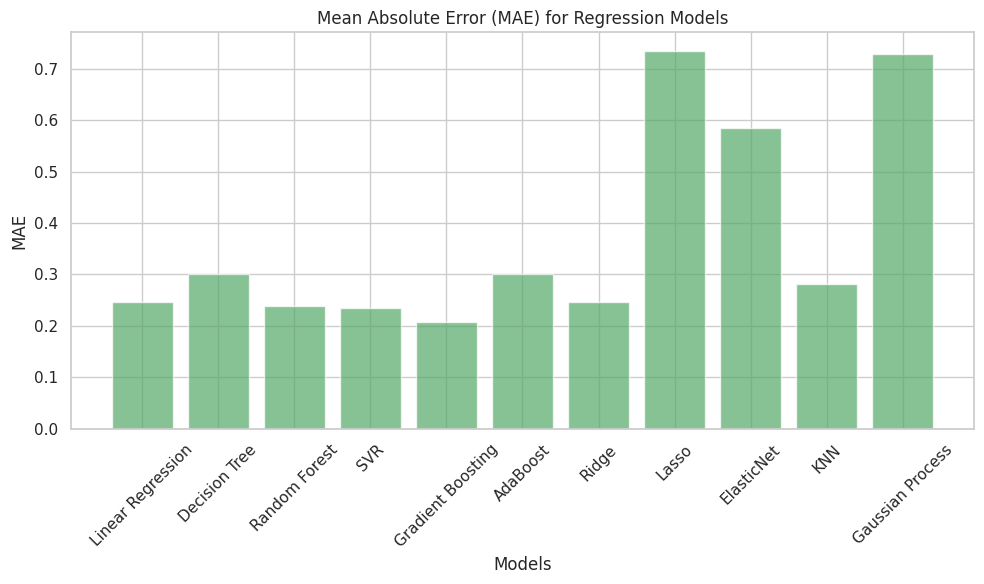

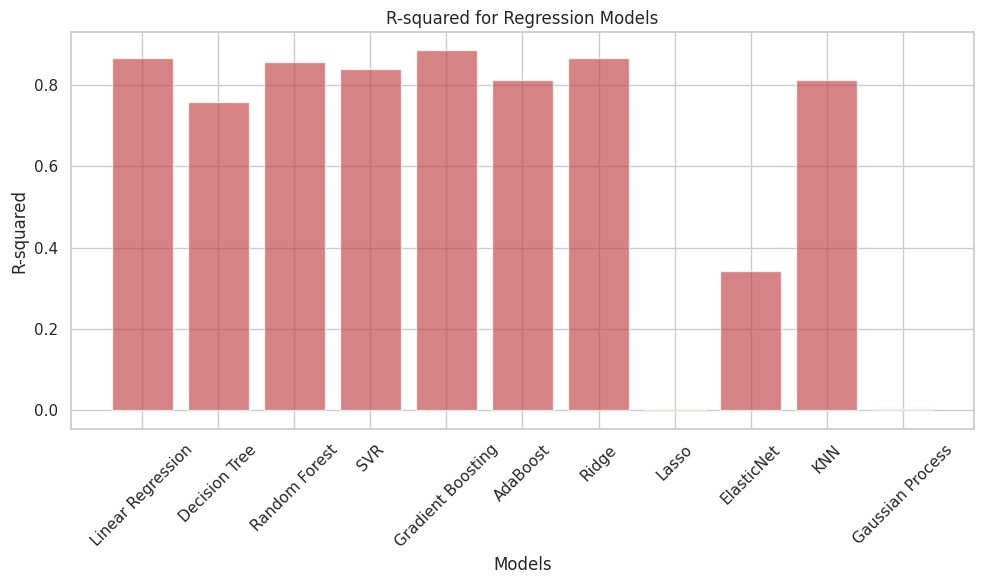

In [39]:
models = [
    "Linear Regression",
    "Decision Tree",
    "Random Forest",
    "SVR",
    "Gradient Boosting",
    "AdaBoost",
    "Ridge",
    "Lasso",
    "ElasticNet",
    "KNN",
    "Gaussian Process"
]

# RMSE values
rmse_values = [
    0.3501114860784041,  # Linear Regression
    0.47199361339990664,  # Decision Tree
    0.36312351512291774,  # Random Forest
    0.3847572103333821,  # SVR
    0.32504872906989035,  # Gradient Boosting
    0.4156596730857431,  # AdaBoost
    0.3498049274109909,  # Ridge
    0.9595863194506697,  # Lasso
    0.7781306319078585,  # ElasticNet
    0.41462582751889077,  # KNN
    0.9579276541266011  # Gaussian Process
]

# MAE values
mae_values = [
    0.24656637808167833,  # Linear Regression
    0.30172041999306065,  # Decision Tree
    0.2380652809891943,  # Random Forest
    0.23511624743774195,  # SVR
    0.20806827561019622,  # Gradient Boosting
    0.30037212990387924,  # AdaBoost
    0.2463095386083,  # Ridge
    0.7341020833772043,  # Lasso
    0.5852813491848606,  # ElasticNet
    0.2823258896950631,  # KNN
    0.7295230622168355  # Gaussian Process
]

# R-squared values
r_squared_values = [
    0.866760212375211,  # Linear Regression
    0.7578449901462614,  # Decision Tree
    0.8566723561109904,  # Random Forest
    0.8390856599100561,  # SVR
    0.8851533957417516,  # Gradient Boosting
    0.8121993904788123,  # AdaBoost
    0.8669934405382761,  # Ridge
    -0.0008968201869419268,  # Lasso
    0.3418479501675922,  # ElasticNet
    0.8131324392338433,  # KNN
    0.002560332151043232  # Gaussian Process
]

# Plotting RMSE
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values, color='b', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Root Mean Squared Error (RMSE) for Regression Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting MAE
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, color='g', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Mean Absolute Error (MAE) for Regression Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting R-squared
plt.figure(figsize=(10, 6))
plt.bar(models, r_squared_values, color='r', alpha=0.7)
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.title('R-squared for Regression Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<a id="Tuning"></a>
## Hyperparameter Tuning and Model Selection
From what we've seen before, it seems like Gradient Boosting and RandomForest are doing really well. Now, let's try to make them even better by adjusting some settings.

In [40]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Parameter grids for both models
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search for Gradient Boosting
grid_search_gb = GridSearchCV(estimator=gradient_boosting, param_grid=gb_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_gb.fit(X_train, y_train)

best_params_gb = grid_search_gb.best_params_
best_model_gb = grid_search_gb.best_estimator_
best_score_gb = grid_search_gb.best_score_

# Grid Search for Random Forest
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=rf_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_
best_score_rf = grid_search_rf.best_score_

# Compare results
if best_score_gb < best_score_rf:
    best_model = best_model_gb
    best_params = best_params_gb
    best_score = best_score_gb
else:
    best_model = best_model_rf
    best_params = best_params_rf
    best_score = best_score_rf

print(f"Best Model: {type(best_model).__name__}")
print(f"Best Parameters: {best_params}")

Best Model: RandomForestRegressor
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


<a id="using_test_data"></a>
## Model Prediction using test data

In [101]:
# Loading test data

test_data = pd.read_csv('test.csv')

def Label_Encoder(df):
    object_cols = df.select_dtypes(include='object').columns
    for col in object_cols:
        df[col] = LabelEncoder().fit_transform(df[col])
    return df

test_data = Label_Encoder(test_data)


from DataFrame_Checker import DataFrameChecker

# An instance of DataFrameChecker
checker = DataFrameChecker(test_data)

# Dropping rows with missing values
test_data = test_data.fillna(test_data.mode().iloc[0])


# Initialize the model
best_model = RandomForestRegressor()


# Define important features
important_features = ['OverallQual', 'GrLivArea', 'ExterQual', 'BsmtQual', 'GarageCars', 'KitchenQual', 'GarageArea', 
                      '1stFlrSF', 'TotalBsmtSF', 'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'YearBuilt', 
                      'YearRemodAdd', 'GarageYrBlt', 'Fireplaces', 'MasVnrArea', 'FireplaceQu', 'HeatingQC', 
                      'Foundation', 'BsmtFinSF1', 'GarageType', 'LotFrontage', 'OpenPorchSF', 'BsmtExposure']

train_data=pd.read_csv('train.csv')
data = Label_Encoder(train_data)
# Prepare training and testing data


data=data.fillna(data.mean())

X_train = data[important_features]
X_test = test_data[important_features]
y_train = data["SalePrice"]

# Train the model
best_model.fit(X_train, y_train)

# Make predictions
predictions = best_model.predict(X_test)

# Create a DataFrame for the results
results = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': predictions})
print(results)

# Save the results as submission.csv
results.to_csv('submission1.csv', index=False)

        Id  SalePrice
0     1461  124761.91
1     1462  150492.00
2     1463  178087.54
3     1464  181680.29
4     1465  202970.18
...    ...        ...
1454  2915   86534.44
1455  2916   87989.50
1456  2917  141992.03
1457  2918  112512.25
1458  2919  228729.68

[1459 rows x 2 columns]


In [107]:
# Initialize the model
best_model = GradientBoostingRegressor()

# Load and preprocess training data
train_data = pd.read_csv('train.csv')
data = Label_Encoder(train_data)

# Fill missing values with means
data = data.fillna(data.mean())

# Separate features and target variable
X_train = data.drop("SalePrice", axis=1)
y_train = data["SalePrice"]

# Train the model
best_model.fit(X_train, y_train)

# Make predictions using all features from test_data
predictions = best_model.predict(test_data)

# Create a DataFrame for the results
results = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': predictions})
print(results)

# Save the results as submission.csv
results.to_csv('submission_gradient_boosting2.csv', index=False)


        Id      SalePrice
0     1461  124522.448137
1     1462  161749.789202
2     1463  179007.031629
3     1464  182124.332393
4     1465  197822.873974
...    ...            ...
1454  2915   78179.187229
1455  2916   80408.881037
1456  2917  153437.337407
1457  2918  121666.865387
1458  2919  238611.083241

[1459 rows x 2 columns]


In [111]:
# Initialize the model
best_model = RandomForestRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300)

# Load and preprocess training data
train_data = pd.read_csv('train.csv')
data = Label_Encoder(train_data)

# Fill missing values with means
data = data.fillna(data.mean())

# Separate features and target variable
X_train = data.drop("SalePrice", axis=1)
y_train = data["SalePrice"]

# Train the model
best_model.fit(X_train, y_train)

# Make predictions using all features from test_data
predictions = best_model.predict(test_data)

# Create a DataFrame for the results
results = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': predictions})
print(results)

# Save the results as submission.csv
results.to_csv('submission_RandomForestRegressor3.csv', index=False)

        Id      SalePrice
0     1461  126175.118436
1     1462  153884.340739
2     1463  181095.181397
3     1464  182844.004201
4     1465  199528.008497
...    ...            ...
1454  2915   86719.064503
1455  2916   85482.186889
1456  2917  151709.725824
1457  2918  114026.534486
1458  2919  226116.178295

[1459 rows x 2 columns]


In [112]:
# Initialize the model
best_model = GradientBoostingRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300)

# Load and preprocess training data
train_data = pd.read_csv('train.csv')
data = Label_Encoder(train_data)

# Fill missing values with means
data = data.fillna(data.mean())

# Separate features and target variable
X_train = data.drop("SalePrice", axis=1)
y_train = data["SalePrice"]

# Train the model
best_model.fit(X_train, y_train)

# Make predictions using all features from test_data
predictions = best_model.predict(test_data)

# Create a DataFrame for the results
results = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': predictions})
print(results)

# Save the results as submission.csv
results.to_csv('submission_GradientBoostingRegressor3.csv', index=False)

        Id      SalePrice
0     1461  126024.925392
1     1462  165430.670474
2     1463  181410.487699
3     1464  175122.331592
4     1465  201265.089294
...    ...            ...
1454  2915   82181.525873
1455  2916   81921.648411
1456  2917  146311.970293
1457  2918  111243.820879
1458  2919  204246.868325

[1459 rows x 2 columns]


<a id="Pytorch"></a>

# 5. Deep Learning (Pytorch Lightening)

In [43]:
# Defining LightningModule
class HousePriceLightningModel(pl.LightningModule):
    def __init__(self, input_dim):
        super(HousePriceLightningModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = nn.MSELoss()(y_hat, y)
        self.log('train_loss', loss)
        return loss
    
    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = nn.MSELoss()(y_hat, y)
        self.log('val_loss', loss)  # Log the validation loss
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)

# Loading Data
data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

# Checking for Missing Values
missing_values = data.isnull().sum()

# Data Preprocessing

# Defining Label Encoder Function
def label_encoder(df):
    object_cols = df.select_dtypes(include='object').columns
    for col in object_cols:
        df[col] = LabelEncoder().fit_transform(df[col])
    return df

# Applying Label Encoder
data = label_encoder(data)

# Handling Missing Values
data = data.fillna(data.mean())

# Defining Features and Target
X = data.drop(['Id', 'SalePrice'], axis=1)
y = data['SalePrice']

# Converting to PyTorch Tensors
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32)


# Defining PyTorch Dataset class

from torch.utils.data import Dataset

class HousePriceDataset(Dataset):
    def __init__(self, features, target):
        self.features = features
        self.target = target

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        x = self.features[idx]
        y = self.target[idx]
        return x, y
    
    

# Initializing LightningModule

input_dim = X.shape[1]
lightning_model = HousePriceLightningModel(input_dim)



# Creating DataLoaders

from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

train_dataset = HousePriceDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = HousePriceDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=32)



# Initialize a Trainer
trainer = pl.Trainer(max_epochs=10)

# Train the Model
trainer.fit(lightning_model, train_loader, val_loader)



# Initialize empty lists to store training and validation losses
train_losses = []
val_losses = []
optimizer = torch.optim.Adam(lightning_model.parameters(), lr=0.001)

for epoch in range(100):
    train_loss_sum = 0.0
    val_loss_sum = 0.0
    
    # Training Step
    for batch in train_loader:
        x, y = batch
        y_hat = lightning_model(x)
        loss = nn.MSELoss()(y_hat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss_sum += loss.item()
    
    # Validation Step
    with torch.no_grad():
        for batch in val_loader:
            x, y = batch
            y_hat = lightning_model(x)
            loss = nn.MSELoss()(y_hat, y)
            val_loss_sum += loss.item()
    
    # average loss for the epoch
    train_loss_avg = train_loss_sum / len(train_loader)
    val_loss_avg = val_loss_sum / len(val_loader)   
    

    # Store the losses for plotting
    train_losses.append(train_loss_avg)
    val_losses.append(val_loss_avg)   
    
    
# Saving the trained model
torch.save(lightning_model.state_dict(), "house_price_model.pt")

Sanity Checking: 0it [00:00, ?it/s]

/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:442: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/conda/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:442: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument

Training: 0it [00:00, ?it/s]

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Validation: 0it [00:00, ?it/s]

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

<a id="Losses"></a>
## Visualizing the Losses(Train VS Validation Loss)

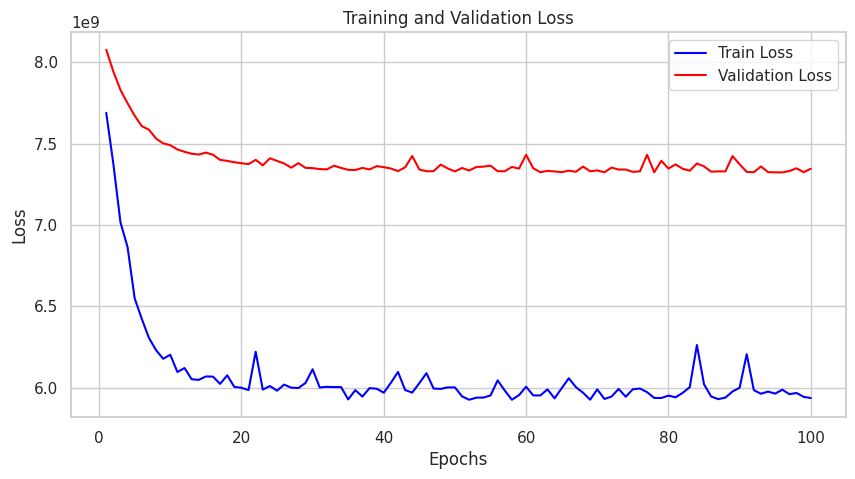

In [44]:
# Visualizing the Losses
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses)+1), train_losses, label='Train Loss', color='blue')
plt.plot(range(1, len(val_losses)+1), val_losses, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

<a id="Final_Prediction"></a>

## End Result

In [45]:
# Defining prediction function

def predict():
    # Load the trained model
    model = HousePriceLightningModel(input_dim)
    model.load_state_dict(torch.load("house_price_model.pt"))
    
    # Loading test data and preprocess
    test_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
    test_data = label_encoder(test_data)
    test_data = test_data.fillna(test_data.mean())
    X_test = test_data.drop('Id', axis=1)
    X_test = torch.tensor(X_test.values, dtype=torch.float32)
    
    # Ensuring the Model is in Evaluation Mode
    model.eval()
    
    # Making Predictions
    with torch.no_grad():
        predictions = model(X_test)
    
    return predictions.numpy()

print("Saving the trained model...")
torch.save(lightning_model.state_dict(), "house_price_model.pt")

print("Making Predictions...")
predictions = predict()

predictions = predictions.reshape(-1)

# Create a DataFrame for the results
results = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': predictions})
results

Saving the trained model...
Making Predictions...


Id      SalePrice
0     1461  180838.296875
1     1462  183275.890625
2     1463  184627.312500
3     1464  183935.062500
4     1465  184322.578125
...    ...            ...
1454  2915  176694.171875
1455  2916  177588.921875
1456  2917  184363.906250
1457  2918  181332.625000
1458  2919  185192.031250

[1459 rows x 2 columns]


<div style="text-align: center;">
    <img src="https://www.hearthaustralia.com.au/wp-content/uploads/2020/09/Hearth-Housing-A_Obq.png" alt="Image" style="width: 50%; height: auto;">
</div>



<div style = "text-align: center"><font size = 5 color = "#00008B" face = "verdana"><b>The total number of homeless people in the world: 122292435. </b></font></div><br/> 
<div style = "text-align: center"><font size = 6 color = "#B22222" face = "verdana"><b>We envision a world without homeless people.</b></font></div> <br/> 
